In [1]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import operator
from scipy import stats
import pandas as pd
import osmnx as ox

# Questão 1

### Criação da rede

In [2]:
g = nx.Graph()
g.add_edge('1','2')
g.add_edge('1','4')
g.add_edge('2','4')
g.add_edge('2','3')
g.add_edge('4','3')
g.add_edge('3','6')
g.add_edge('3','7')
g.add_edge('6','7')
g.add_edge('3','5')

### Plot:

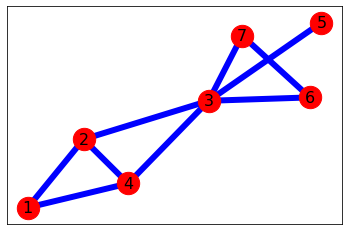

In [3]:
def plot_network(g, ax=-1):
    labels = g.nodes()
    pos = nx.spring_layout(g)
    if(ax == -1):
        nx.draw_networkx(g, with_labels=True, node_color='r', edge_color='b', node_size=500, font_size=16, 
                     pos=pos, width=6)
    else:
        nx.draw_networkx(g, with_labels=True, node_color='r', edge_color='b', node_size=500, font_size=16, 
                     pos=pos, width=6, ax=ax)
plot_network(g)
plt.show(True)

## 1)A) Distribuição de graus dos vértices

### Solução Manual

Matriz de adjacências: 

A=
$\begin{pmatrix}
0 & 1 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

Grau do vértice: $k_i = \sum_{j=1}^n A_{ij}$

Vértice 1: $k_1 = A_{12} + A_{14} = 2$

Vértice 2: $k_2 = A_{21} + A_{23} + A_{24} = 3$

Vértice 3: $k_3 = A_{32} + A_{34} + A_{35} + A_{36} + A_{37} = 5$

Vértice 4: $k_4 = A_{41} + A_{42} + A_{43} = 3$

Vértice 5: $k_5 = A_{53} = 1$

Vértice 6: $k_6 = A_{63} + A_{67} = 2$

Vértice 7: $k_7 = A_{73} + A_{76} = 2$

Distribuição dos graus: $P(k_i=x) = \frac{N_x}{N}\$

$P(k_i=1) = \frac{1}{7}\ \approx\ 0.14$

$P(k_i=2) = \frac{3}{7}\ \approx\ 0.42$

$P(k_i=3) = \frac{2}{7}\ \approx\ 0.28$

$P(k_i=4) = 0$

$P(k_i=5) = \frac{1}{7}\ \approx\ 0.14$

### Solução Computacional

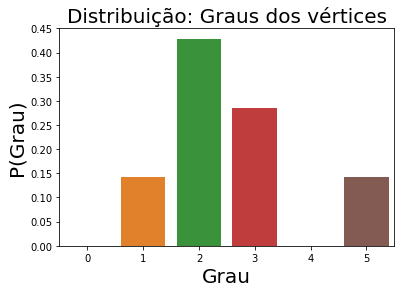

In [4]:
def degree_distribution(g):
    #Builds a list that contains only the degree of each node in the network 
    degrees = np.array(list(dict(g.degree()).values()))    
    
    #Counts how often each degree value appears on the list
    unique, counts = np.unique(degrees, return_counts=True)
    
    #Creates a list containing only zeroes
    #The index represents the degree, and the value it contains
    #represents how often that degree appears in the network
    #This step is necessary in order to set "0" to the frequency of
    #the degree values that are not present in the network
    freq = np.zeros(np.max(unique)+1)
    
    possib = np.arange(np.max(unique+1))
    #Populates the list with the frequency of the degree
    #values actually present in the network
    for value, count in zip(unique, counts):
        freq[value] = count

    #Divides the degree frequency array by the total number of nodes
    #in the network, thus resulting in the probability distribution
    #of a node in the network having a certain degree K
    #Or P(node_degree=k)
    dist = freq/len(g.nodes())
    return possib, freq, dist

possible_degrees, freq, degree_dist = degree_distribution(g)

sns.barplot(x=np.arange(0,len(degree_dist)), y=degree_dist).set_title('Distribuição: Graus dos vértices', fontsize=20)
plt.xlabel('Grau', fontsize=20)
plt.ylabel('P(Grau)', fontsize=20)
plt.show()

## 1) B) Distribuição de coeficientes de clustering

### Solução manual

Clustering local: $ C_i = \frac{2e_i}{k_i(k_i-1)}\ $, sendo $e_i$ o número de arestas entre 
os vizinhos de i, e $k_i$ o número de vértices vizinhos de i.



Clustering médio: $C_L = \frac{ \sum_{i=1}^N Ci}{N}\$

$C_1 = \frac{2x1}{2x(2-1)} = \frac{2}{2} = 1$

$C_2 = \frac{2x2}{3x(3-1)} = \frac{4}{6} \approx 0.66 $

$C_3 = \frac{2x2}{5x(5-1)} = \frac{4}{20} = 0.2$

$C_4 = \frac{2x2}{3x(3-1)} = \frac{4}{6} \approx 0.66$

$C_5 = 0$

$C_6 = \frac{2x1}{2x(2-1)} = \frac{2}{2} = 1$

$C_7 = \frac{2x1}{2x(2-1)} = \frac{2}{2} = 1$

$C_L = \frac{1 + \frac{4}{6} + 0.2 + \frac{4}{6} + 0 + 1 + 1}{7} \approx 0.64 $

### Solução computacional

ccs [1.         0.66666667 0.66666667 0.2        1.         1.
 0.        ]
Valores unicos de CC [0.         0.2        0.66666667 1.        ] 
	Distribuicao [0.14285714 0.14285714 0.28571429 0.42857143]


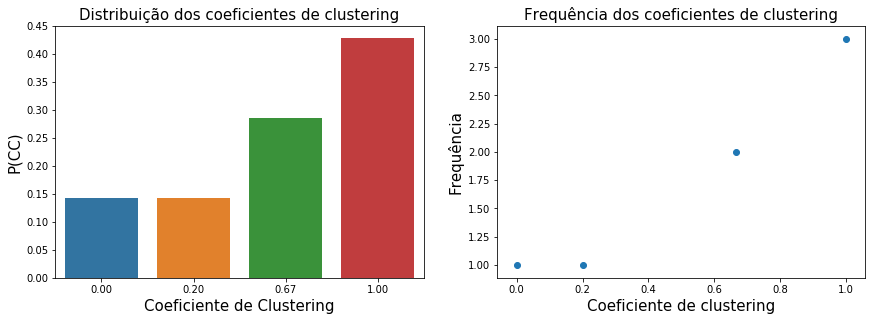

In [5]:
avg_clustering = nx.average_clustering(g)
#print('Average clustering:', avg_clustering)

def cc_distribution(g):
    ccs = []
    for node in g.nodes():
        ccs.append(nx.clustering(g, node))
    ccs = np.array(ccs)
    #print('clustering de cada nó', local)
    unique, freq = np.unique(ccs, return_counts=True)
    dist = freq/sum(freq)
    return ccs, freq, dist

ccs, ccs_freq, ccs_dist = cc_distribution(g)
print('ccs', ccs)
print('Valores unicos de CC', np.unique(ccs), '\n\tDistribuicao', ccs_dist)

fig, axis = plt.subplots(ncols=2)
plt.subplots_adjust(top=1,right=2)

xticklabels = ['{:.2f}'.format(float(x)) for x in np.unique(ccs)]
#Left plot formatting
graph = sns.barplot(x=np.unique(ccs), y=ccs_dist, ax=axis[0])
graph.set_title('Distribuição dos coeficientes de clustering', fontsize=15)
graph.set_ylabel('P(CC)', fontsize=15)
graph.set_xlabel('Coeficiente de Clustering', fontsize=15)
graph.set_xticklabels(xticklabels)

#Right plot formatting
#axis[1].set(xscale='log', yscale='log')
'''graph = sns.scatterplot(x=(ccs), ax=axis[1])
graph.set_title('Frequência dos coeficientes de clustering', fontsize=15)
graph.set_ylabel('Frequência', fontsize=15)
graph.set_xlabel('Coeficiente de clustering', fontsize=15)
graph.set_xticklabels(xticklabels)'''
axis[1].scatter(x=np.unique(ccs), y=ccs_freq)
axis[1].set_title('Frequência dos coeficientes de clustering', fontsize=15)
axis[1].set_ylabel('Frequência', fontsize=15)
axis[1].set_xlabel('Coeficiente de clustering', fontsize=15)

plt.show()

## 1) C) Transitividade

### Solução manual

In [6]:
%%html
<style>
    table {
        display:inline-block;
    }
</style>

|Vértice|Grau|Triplas|
|--|--|--|
|1|2|1|
|2|3|3|
|3|5|10|
|4|3|3|
|5|1|0|
|6|2|1|
|7|2|1|

Total de triângulos: 3

Total de triplas: 19

Transitividade = $ \frac{3 \times \text{Número de triângulos}}{\text{Número de triplas conectadas}}$ = $= \frac{3\times3}{19} \approx 0.47$


### Solução computacional

In [7]:
transitivity = nx.transitivity(g)
print('Transitividade:', transitivity)

Transitividade: 0.47368421052631576


## 1) D) Matriz de distâncias

### Solução manual

Matriz original A=
$\begin{pmatrix}
0 & 1 & 0 & 1 & 0 & 0 & 0\\
1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 1\\
0 & 0 & 1 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

Matriz de distâncias D =
$\begin{pmatrix}
0 & 1 & 2 & 1 & 3 & 3 & 3\\
1 & 0 & 1 & 1 & 2 & 2 & 2\\
2 & 1 & 0 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 0 & 2 & 2 & 2\\
3 & 2 & 1 & 2 & 0 & 2 & 2\\
3 & 2 & 1 & 2 & 2 & 0 & 1\\
3 & 2 & 1 & 2 & 2 & 1 & 0\\
\end{pmatrix}$

### Solução computacional

Matriz de distâncias [[0. 1. 2. 1. 3. 3. 3.]
 [1. 0. 1. 1. 2. 2. 2.]
 [2. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 2. 2. 2.]
 [3. 2. 1. 2. 0. 2. 2.]
 [3. 2. 1. 2. 2. 0. 1.]
 [3. 2. 1. 2. 2. 1. 0.]]
Valores únicos, contagens (array([0., 1., 2., 3.]), array([ 7, 18, 18,  6]))
Probabilidades [0.14285714 0.36734694 0.36734694 0.12244898]


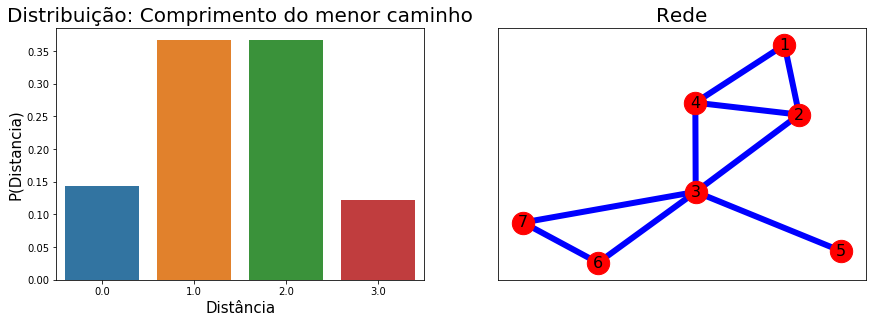

In [8]:
def dist_matrix(g):
    nodes = list(g.nodes())
    nodes.sort()
    node_num = len(nodes)
    
    dist_mat = np.zeros((node_num, node_num))
    for i in np.arange(node_num):
        for j in np.arange(i+1, node_num):
            #print('i=', i, 'nodes[i]=', nodes[i], 'j=', j, 'nodes[j]=', nodes[j])
            if(i != j):
                dist = len(nx.shortest_path(g, nodes[i], nodes[j]))-1
                dist_mat[i][j] = dist
                dist_mat[j][i] = dist
    return dist_mat

dist_mat = dist_matrix(g)
print('Matriz de distâncias', dist_mat)
print('Valores únicos, contagens', np.unique(dist_mat, return_counts=True))
print('Probabilidades', np.unique(dist_mat, return_counts=True)[1]/dist_mat.flatten().shape[0])

path_sizes, path_counts = np.unique(dist_mat, return_counts=True)
path_probs = path_counts/np.sum(dist_mat.flatten().shape[0])

fig, axis = plt.subplots(ncols=2)
plt.subplots_adjust(top=1,right=2)


axis[0].set_title('Distribuição: Comprimento do menor caminho', fontsize=20)
sns.barplot(x=path_sizes, y=path_probs, ax=axis[0])
axis[0].set_ylabel('P(Distancia)', fontsize=15)
axis[0].set_xlabel('Distância', fontsize=15)

axis[1].set_title('Rede', fontsize=20)
plot_network(g, ax=axis[1])

plt.show(True)

### 1) E) Entropia da distribuição de graus

### Solução manual

A entropia de uma distribuição de probabilidade é definida como $ H = -\sum_{k=0}^\infty P(k)logP(k) $.

A distribuição de graus calculada anteriormente é:

$P(k_i=1) = \frac{1}{7}\ \approx\ 0.14$

$P(k_i=2) = \frac{3}{7}\ \approx\ 0.42$

$P(k_i=3) = \frac{2}{7}\ \approx\ 0.28$

$P(k_i=4) = 0$

$P(k_i=5) = \frac{1}{7}\ \approx\ 0.14$

A entropia é, portanto, $ H = -(0.14 \times log(0.14) + 0.42 \times log(0.42) + 0.28 \times log(0.28) + 0 + 0.14\times log(0.14)) \approx 1.83 $

### Solução computacional

In [9]:
def shannon_entropy(g):
    _, freq, dist = degree_distribution(g)
    entropy = 0
    for prob in dist:
        if(prob != 0.):
            entropy += -prob*math.log(prob, 2)
    
    return entropy

print('Entropia de Shannon:', shannon_entropy(g))

Entropia de Shannon: 1.8423709931771088


### 1) F) Segundo momento da distribuição de graus

### Solução manual

Segundo momento amostral: $ M_y(t) = k^t*P(y=k) $

A distribuição de graus calculada anteriormente é:

$P(k_i=1) = \frac{1}{7}\ \approx\ 0.14$

$P(k_i=2) = \frac{3}{7}\ \approx\ 0.42$

$P(k_i=3) = \frac{2}{7}\ \approx\ 0.28$

$P(k_i=4) = 0$

$P(k_i=5) = \frac{1}{7}\ \approx\ 0.14$

Desta maneira, o segundo momento é dado por:

$ M_y(2) = 1^2*0.14 + 2^2*0.42 + 3^2*0.28 + 0 + 5^2*0.14 \approx 7.84$

### Solução computacional

In [10]:
def compute_moment(g, m):
    deg, _, dist = degree_distribution(g)
    moment = np.sum((deg**m)*dist)
    return moment

print('Segundo momento:', compute_moment(g,2))

Segundo momento: 7.999999999999999


## Questão 2

### Carregando um dígrafo ponderado com peso

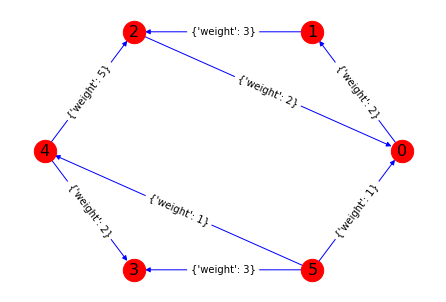

In [11]:
g2 = nx.DiGraph([
    (0,1,{'weight': 2}),
    (1,2,{'weight': 3}),
    (2,0,{'weight': 2}),
    (4,3,{'weight': 2}),
    (4,2,{'weight': 5}),
    (5,0,{'weight': 1}),
    (5,3,{'weight': 3}),
    (5,4,{'weight': 1})])

pos = nx.circular_layout(g2)
nx.draw(g2, with_labels = True, node_color='red', edge_color='blue', node_size=500, font_size=16, pos = pos)
nx.draw_networkx_edge_labels(g2, pos)
plt.show(True)

### Conversão para grafo não-direcionado sem peso

original g2 [[0. 2. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 3. 0.]]
new g2 [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


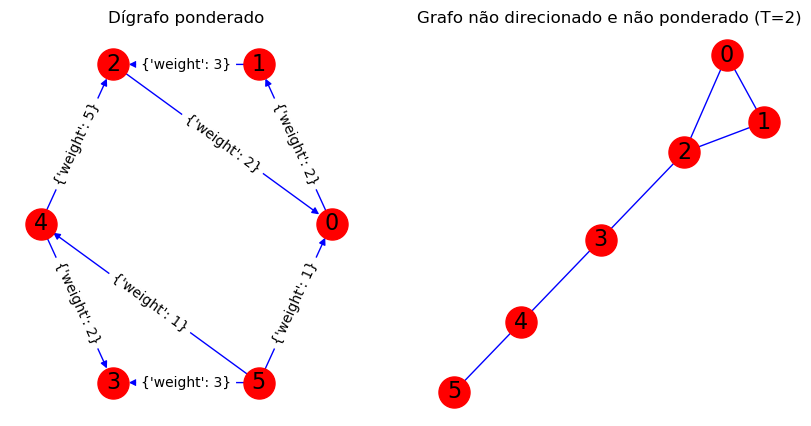

In [12]:
#Converts g2 into a numpy matrix
g2m = nx.to_numpy_matrix(g2)
print('original g2', g2m)
#Makes directed edges undirected
undir_g2m = g2m + g2m.T
new_g2m = np.zeros(g2m.shape)

#Applies a thresholding function to the undirected graph 
new_g2m[undir_g2m >= 2] = 1
new_g2 = nx.from_numpy_matrix(new_g2m)

print('new g2', new_g2m)

plt.style.use('default')
fig, axis = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((10,5))

axis[0].set_title('Dígrafo ponderado')
pos = nx.circular_layout(g2)
nx.draw(g2, with_labels = True, node_color='red', edge_color='blue', node_size=500, font_size=16, pos = pos, ax=axis[0])
nx.draw_networkx_edge_labels(g2, pos, ax=axis[0])

axis[1].set_title('Grafo não direcionado e não ponderado (T=2)')
pos = nx.spring_layout(new_g2)
nx.draw(new_g2, with_labels=True, node_color='red', 
        edge_color='blue', node_size=500, font_size=16, pos = pos, ax=axis[1])
plt.show()

## Los Miserables (com peso)

('Napoleon', 'Myriel')
(1, 8)


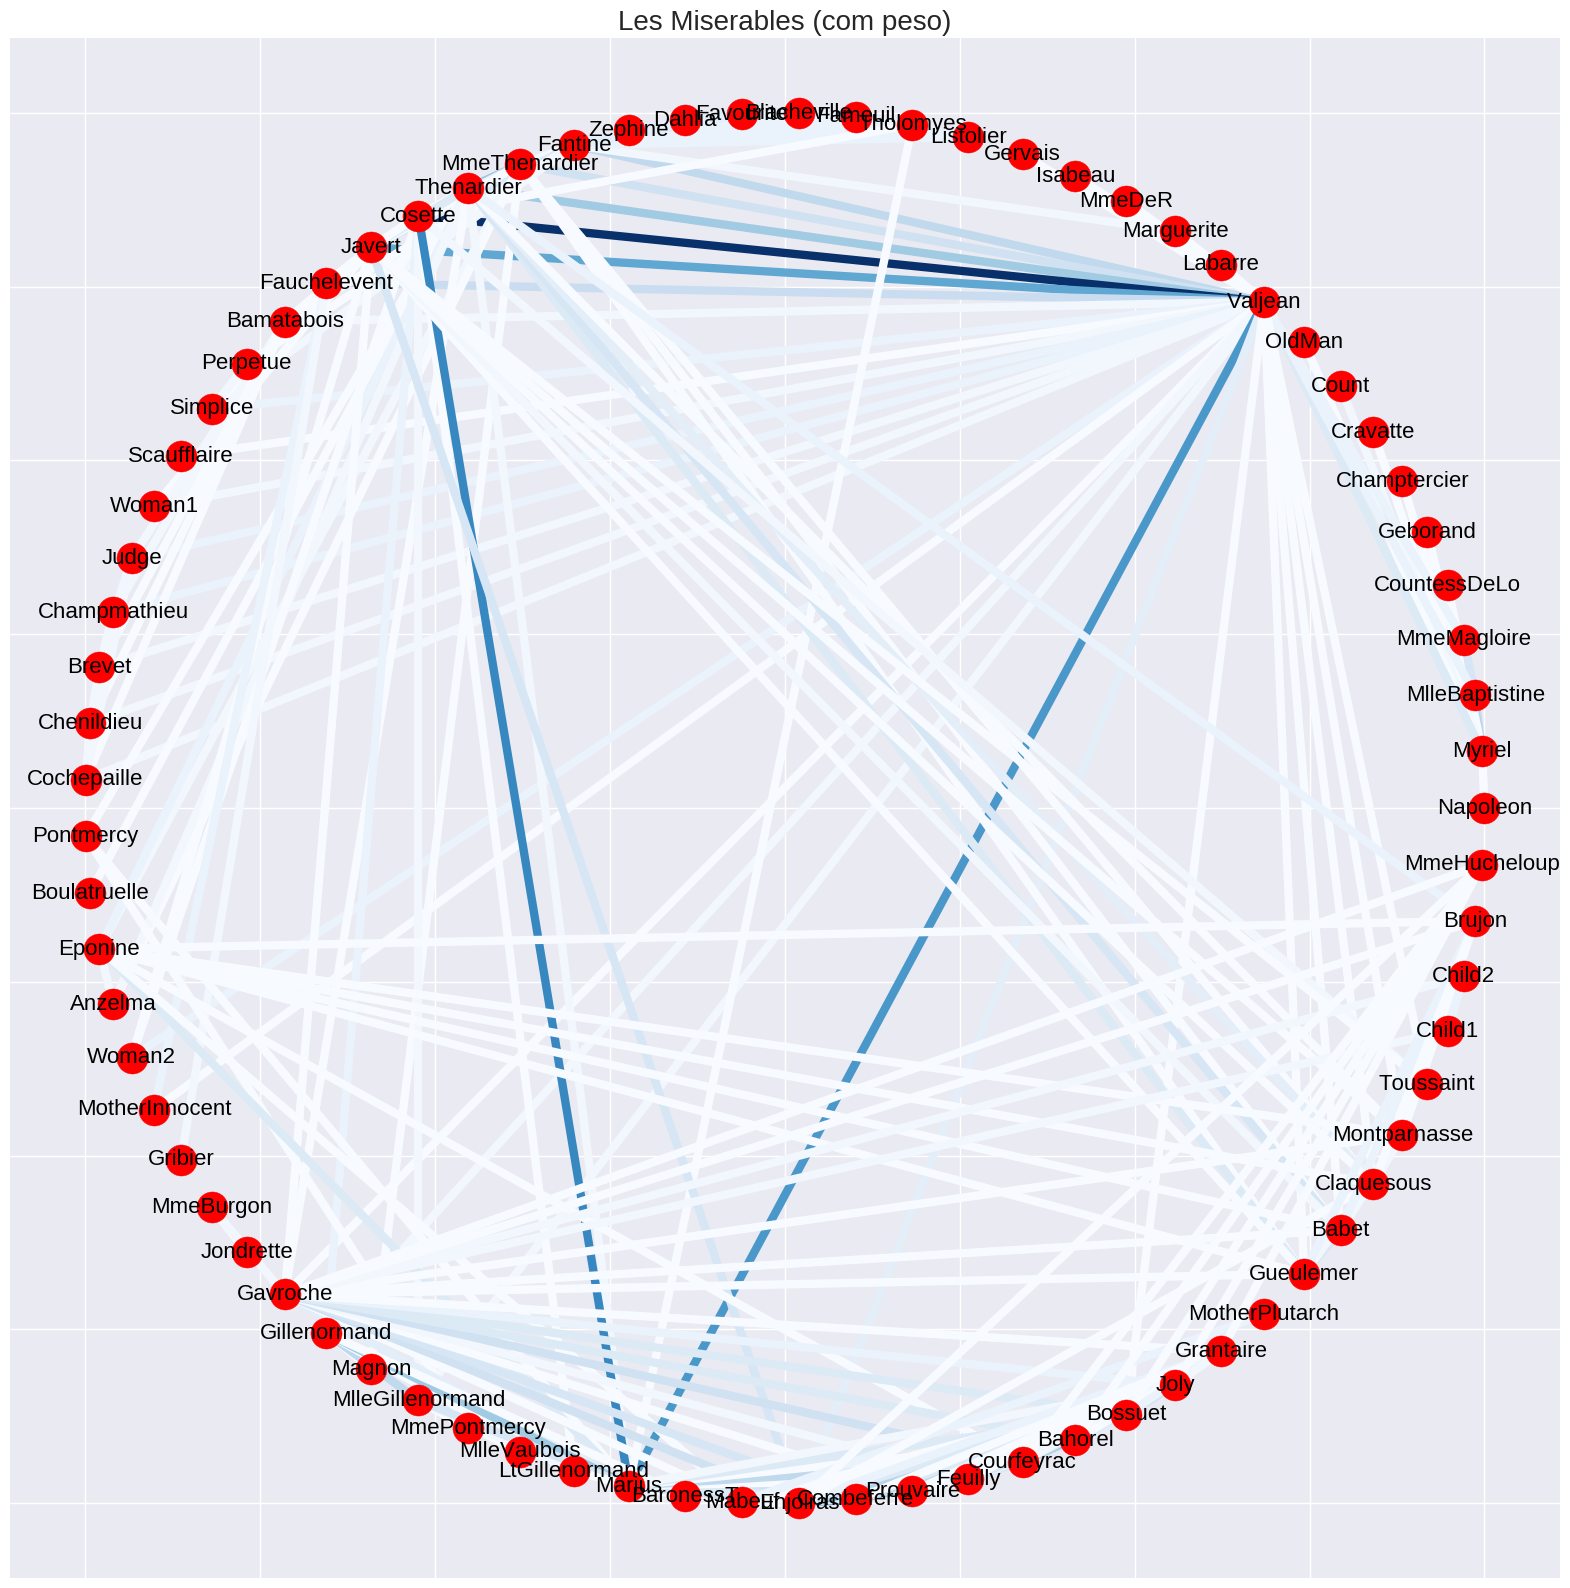

In [13]:
lesmis_weighted = nx.les_miserables_graph()

#g3 = nx.read_weighted_edgelist('datasets/les_miserables', comments='%')
plt.figure(figsize=(20,20))
plt.style.use('seaborn')
pos = nx.circular_layout(lesmis_weighted)

edges, weights = zip(*nx.get_edge_attributes(lesmis_weighted, 'weight').items())
print(edges[0])
print(weights[0:2])

nx.draw_networkx(lesmis_weighted, pos=pos, with_labels=True, node_color='red', edgelist=edges, edge_color=weights, 
                 edge_cmap = plt.cm.Blues, node_size=500, font_size=16, font_color='black', width=6)
#nx.draw_networkx_edge_labels(g3, pos)
plt.title('Les Miserables (com peso)', fontsize=20)
plt.show()

### Los Miserables (sem peso)

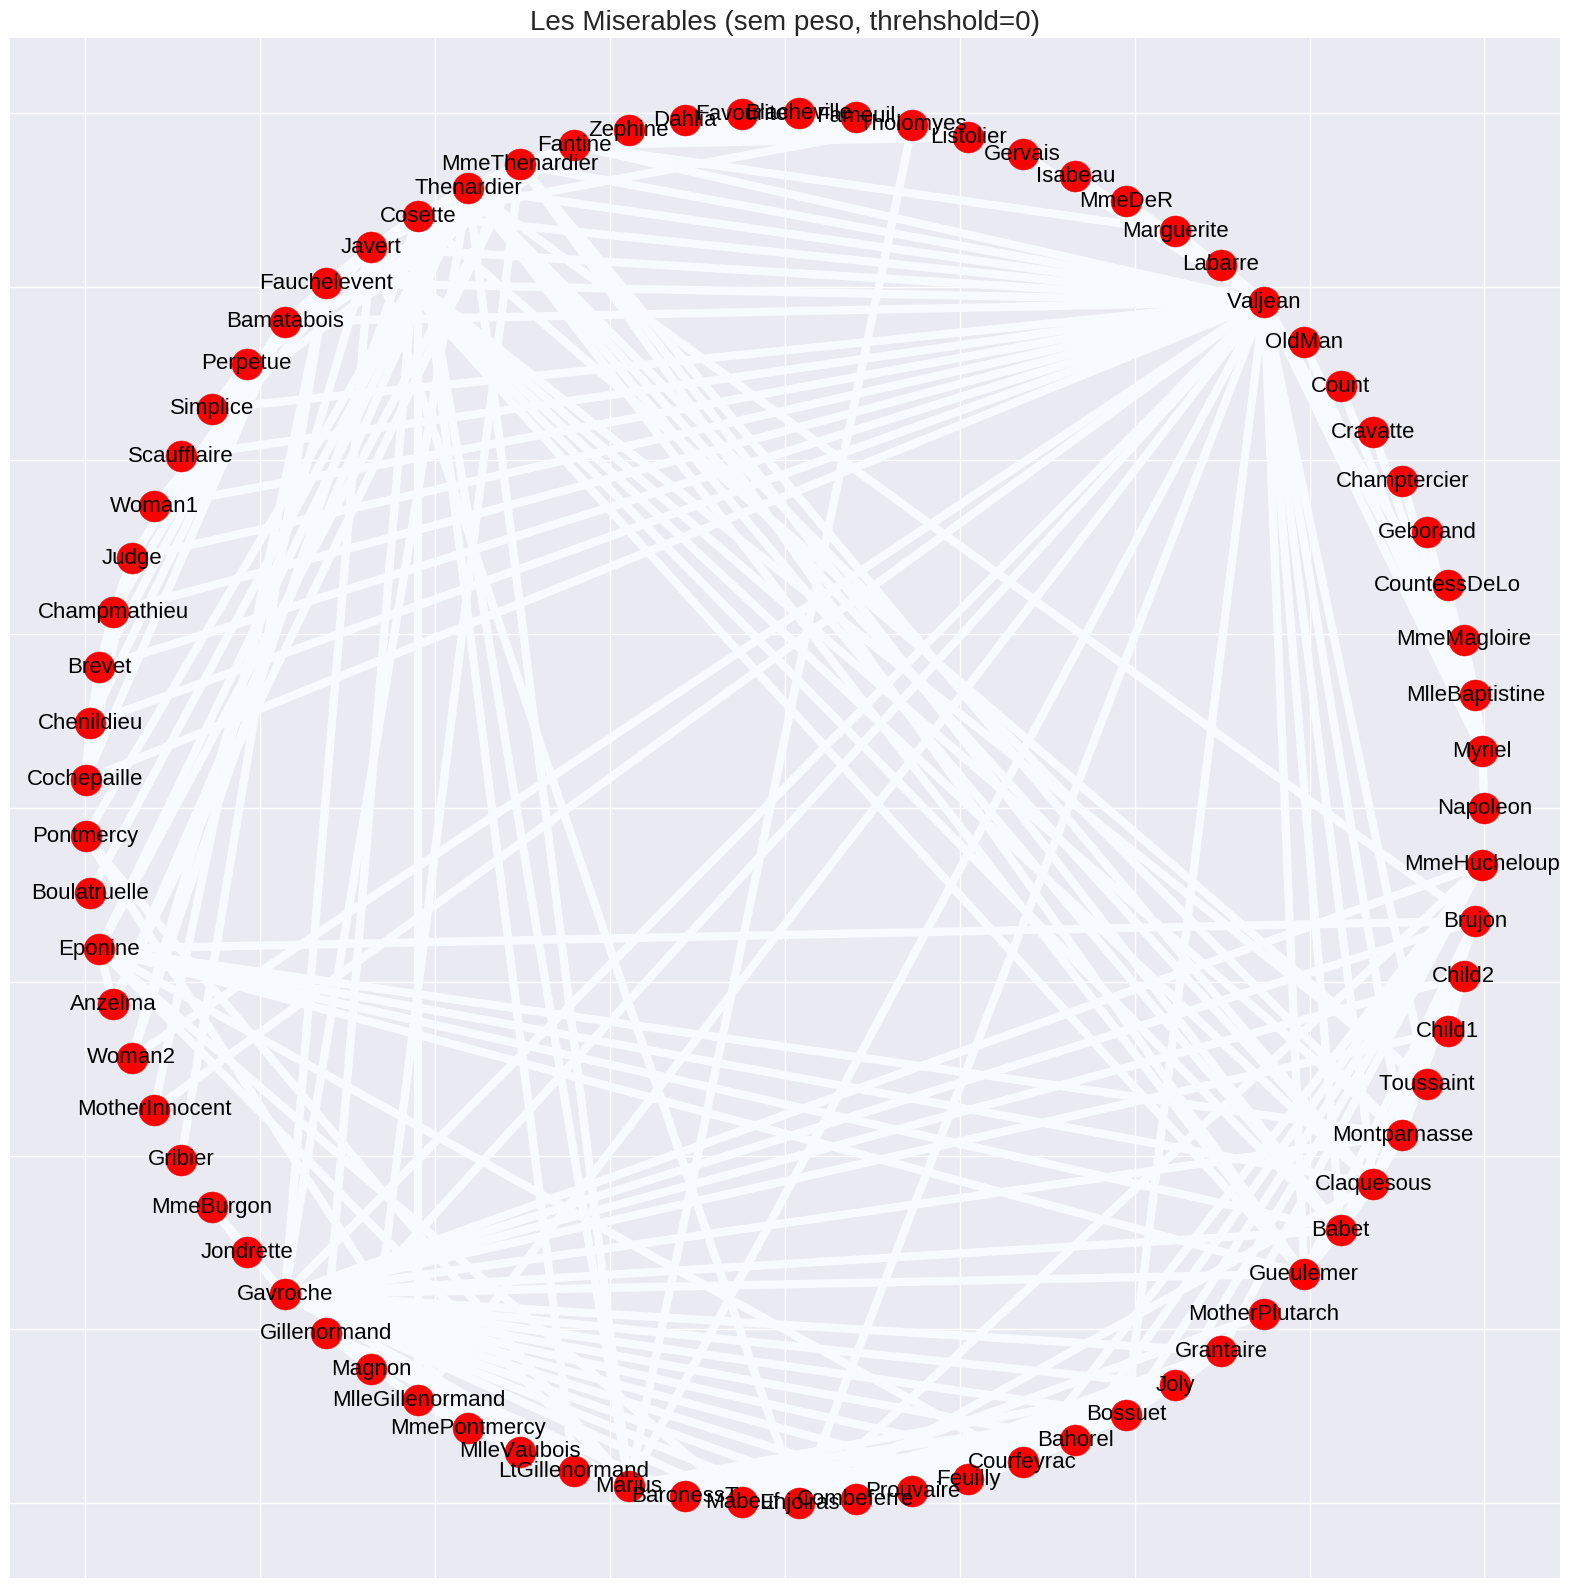

In [14]:
def threshold_graph(g, min_weight):
    undir_g = nx.Graph()
    undir_g.add_nodes_from(g)
    for (u, v, w) in g.edges(data=True):
        if(w['weight'] > min_weight):
            undir_g.add_edge(u, v, weight=1)

    return undir_g

threshold = 0
lesmis_unweighted = threshold_graph(lesmis_weighted, threshold)
edges, weights = zip(*nx.get_edge_attributes(lesmis_unweighted, 'weight').items())

pos = nx.circular_layout(lesmis_unweighted)
plt.figure(figsize=(20,20))
nx.draw_networkx(lesmis_unweighted, with_labels=True, node_color='red', edgelist=edges, edge_color=weights, 
                 edge_cmap= plt.cm.Blues, node_size=500, font_size=16, font_color='black', pos=pos, width=6)
plt.title('Les Miserables (sem peso, threhshold={})'.format(threshold), fontsize=20)
plt.show()

### Florida Ecosystem Wet (com peso)

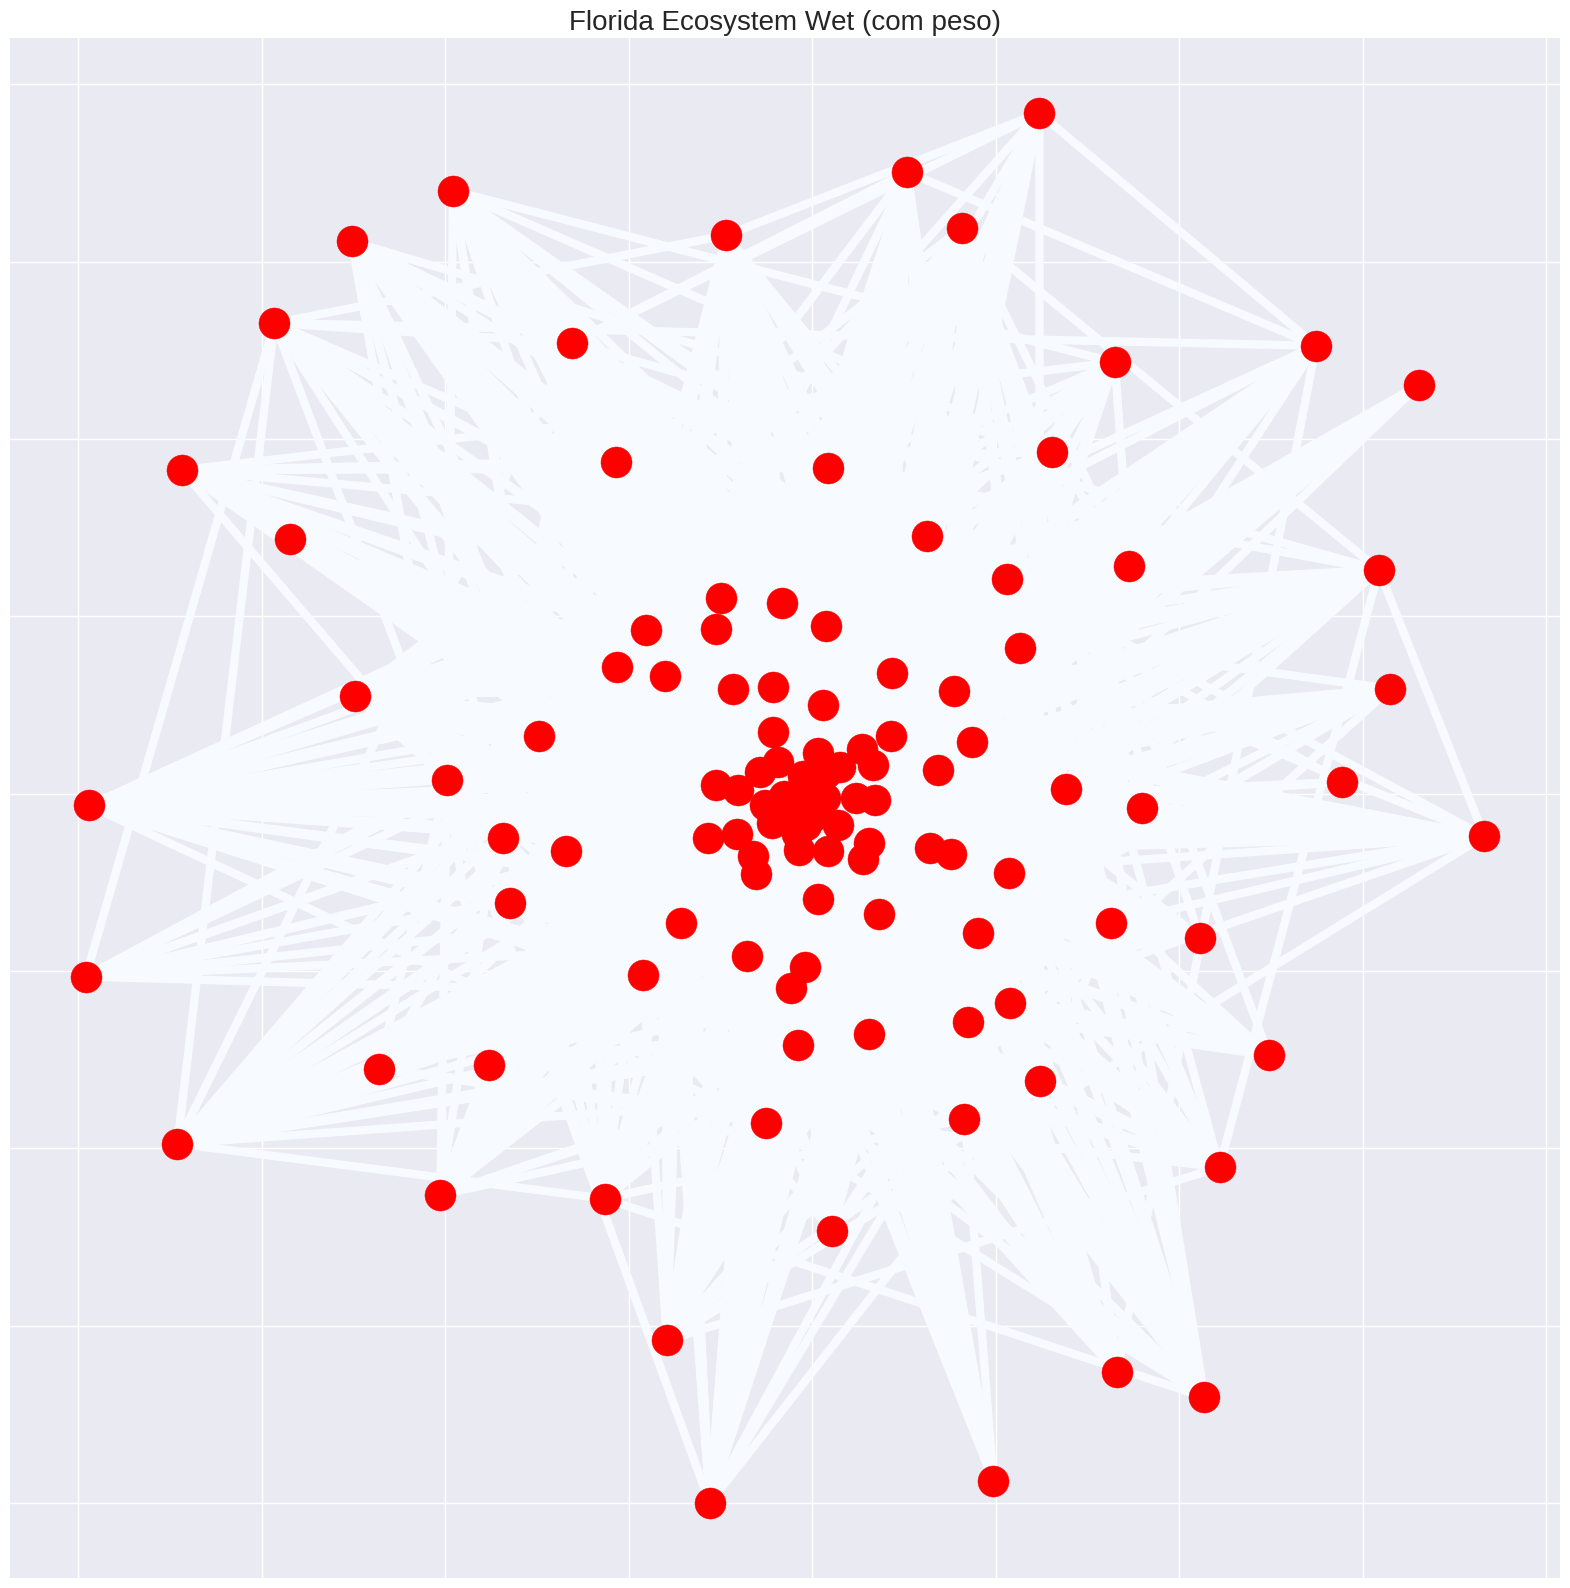

In [15]:
florida_weighted = nx.read_weighted_edgelist('datasets/florida', comments='%')


edges, weights = zip(*nx.get_edge_attributes(florida_weighted, 'weight').items())

plt.style.use('seaborn')
plt.figure(figsize=(20,20))
pos = nx.spring_layout(florida_weighted)
nx.draw_networkx(florida_weighted, with_labels=False, node_color='red', edgelist=edges, edge_color=weights, 
                 edge_cmap= plt.cm.Blues, node_size=500, font_size=16, font_color='black', pos=pos, width=6)
#nx.draw_networkx_edge_labels(g4, pos)

plt.title('Florida Ecosystem Wet (com peso)', fontsize=20)
plt.show()

### Florida Ecosystem Wet (sem peso)

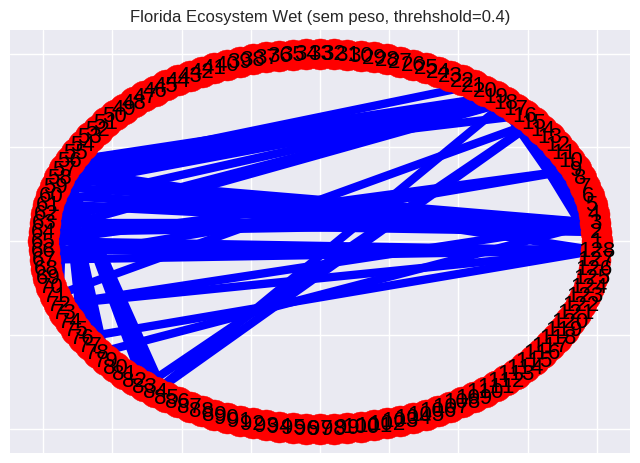

In [16]:
threshold = 0.4
florida_unweighted = threshold_graph(florida_weighted, threshold)

pos = nx.circular_layout(florida_unweighted)
nx.draw_networkx(florida_unweighted, with_labels=True, node_color='red', edge_color='blue', node_size=500, font_size=16, 
             font_color='black', pos=pos, width=6)
#nx.draw_networkx_edge_labels(undir_g4, pos)
plt.title('Florida Ecosystem Wet (sem peso, threhshold={})'.format(threshold))
plt.show()

## Questão 3

### Implementação da rotina de random walk e teste em uma rede simples

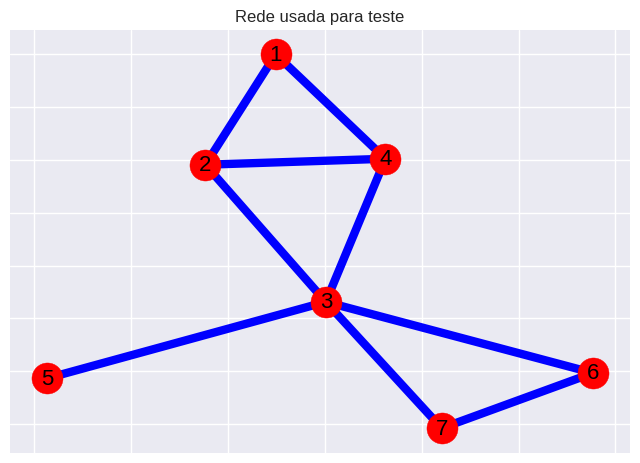

[[0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0.]]


In [17]:
g = nx.Graph()
g.add_edge('1','2')
g.add_edge('1','4')
g.add_edge('2','4')
g.add_edge('2','3')
g.add_edge('4','3')
g.add_edge('3','6')
g.add_edge('3','7')
g.add_edge('6','7')
g.add_edge('3','5')
plot_network(g)
plt.title('Rede usada para teste')
plt.show()

print(nx.to_numpy_array(g, nodelist=sorted(g.nodes())))


[0 1 2 3 4 5 6]
[1110 1642 2821 1681  588 1045 1113]


Text(0.5, 1.0, 'Histograma: Teste de visitas do random walk')

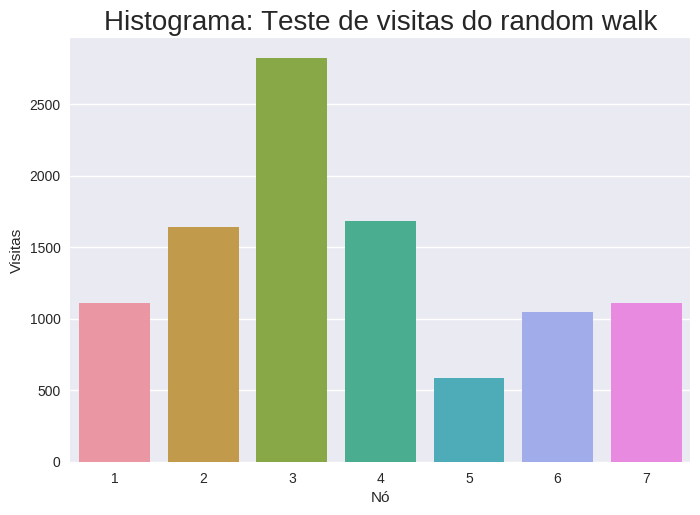

In [18]:
def random_walk(g, steps):
    g_mat = nx.to_numpy_array(g, nodelist=sorted(g.nodes()))
    #print(g_mat)
    '''edge_probs = (1/np.sum(g_mat, 0))
    prob_mat = np.zeros(g_mat.shape)
    for i in range(g_mat.shape[0]):
        prob_mat[i,:] = g_mat[i,:]*edge_probs[i]'''
        
    #print(np.random.choice(np.arange(g_mat.shape[1])[g_mat[6,:] == 1], 10))
    
    path = np.zeros((steps,), dtype=np.int64)
    step = 0
    for i in range(steps-1):
        path[i] = step
        step = np.random.choice(np.arange(g_mat.shape[1])[g_mat[step, :] > 0.0])
    path[i+1] = step
    return path
        
path = random_walk(g, 10000)
vertices, counts = np.unique(path, return_counts=True)
dist = counts/np.sum(counts)
print(vertices)
print(counts)
plt.xlabel('Nó')
plt.ylabel('Visitas')
sns.barplot(x=vertices+1, y=counts).set_title('Histograma: Teste de visitas do random walk', fontsize=20)


### Observa-se que nós de grau maior foram visitados com maior frequência.

### Faz-se o experimento agora aplicando a rotina de random walk à rede de Les Miserables

In [19]:
#A função que transforma a rede em um array do numpy não garante a ordem dos vértices
#Foi implementada esta função, que garante que é usada a mesma ordem do random walk
def compute_degrees(g):
    g_mat = nx.to_numpy_array(g, nodelist=sorted(g.nodes()))
    degs = np.sum(g_mat, 1, dtype=np.int64)
    return degs
sample_deg = compute_degrees(g)
print(sample_deg)
print(np.unique(sample_deg, return_counts=True))

[2 3 5 3 1 2 2]
(array([1, 2, 3, 5]), array([1, 3, 2, 1]))


Text(0.5, 1.0, 'Les Miserables\nNúmero de visitas x grau')

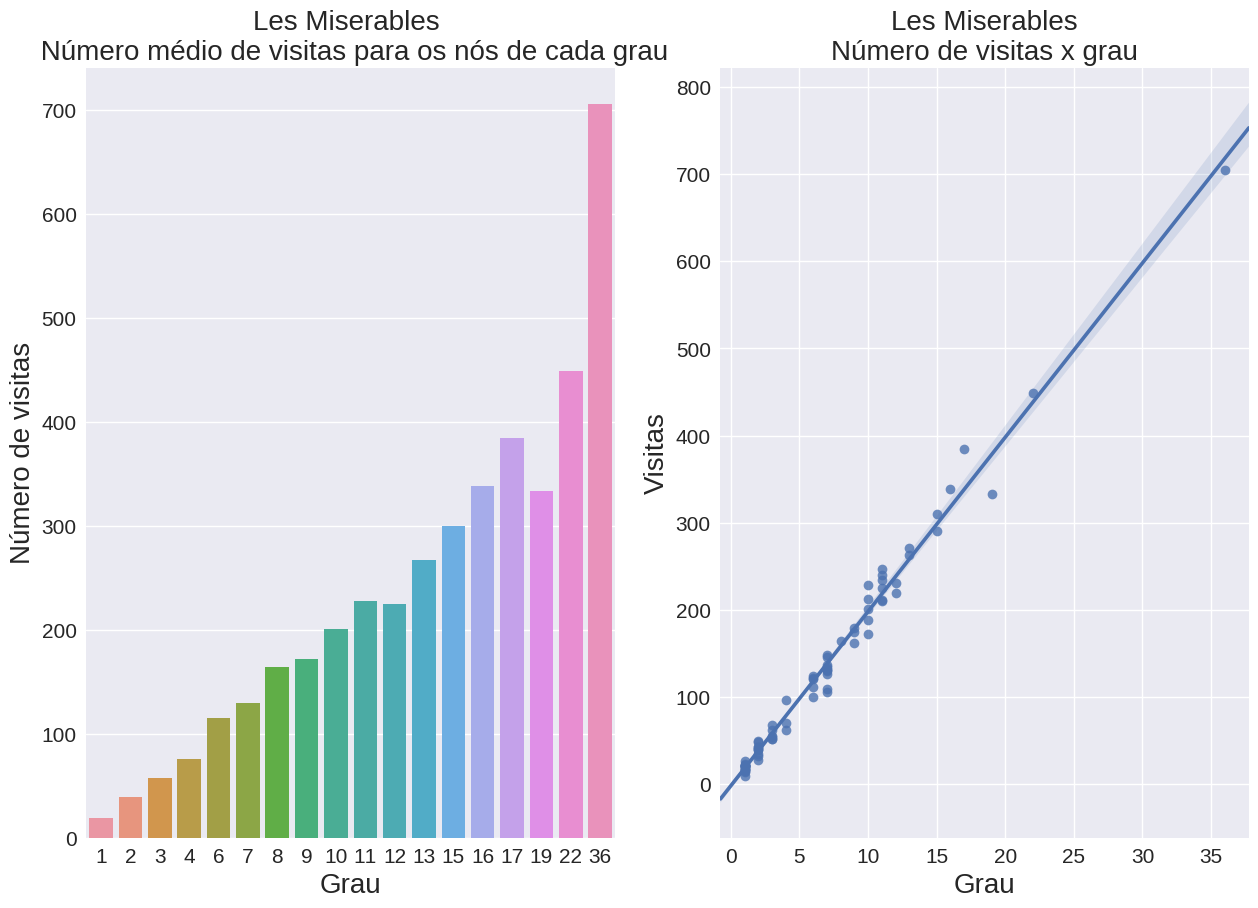

In [20]:
#Computa numero total e medio de visitas por grau, e cria uma matriz
#de 2 colunas, com cada observacao das variaveis grau e numero de visitas
def visits_per_degree(g, path):
    #Conta o numero de visitas pra cada nó
    nodes, node_visit_count = np.unique(path, return_counts=True)
    
    #Computa o grau dos vértices
    node_degrees = compute_degrees(g)
    
    #Conta o número de vértices por grau
    unique_degrees, node_degree_count = np.unique(node_degrees, return_counts=True)    
    
    nodes_per_degree = dict(zip(unique_degrees, node_degree_count))

    #Armazena quantas visitas houve para todos os nós de determinado grau
    total_visits_per_degree = dict()
    
    visit_degrees = []
    for node, visit_count, degree in zip(nodes, node_visit_count, node_degrees):        
        if(degree in total_visits_per_degree.keys()):
            total_visits_per_degree[degree] += visit_count
        else:
            total_visits_per_degree[degree] = visit_count

        visit_degrees.append([degree, visit_count])
    
    #Matriz que contem cada observação dos pares de variáveis grau x visitas no caminho
    #feito pelo random walk
    visit_degrees_matrix = np.array(visit_degrees)
    
    #Computa numero medio de visitas por grau
    average_visits_per_degree = dict()
    for degree in nodes_per_degree.keys():
        average_visits_per_degree[degree] = total_visits_per_degree[degree]/nodes_per_degree[degree]        

    sorted_avg = sorted(average_visits_per_degree.items(), key=operator.itemgetter(1))
    degrees, avg_visits = (zip(*sorted_avg))
    average_visits_per_degree = dict(zip(degrees, avg_visits))

    return total_visits_per_degree, average_visits_per_degree, visit_degrees_matrix

#tira os pesos da rede do Les Miserables
lesmis_unweighted = threshold_graph(lesmis_weighted, 0)
#Faz o random walk. Retorna o caminho realizado pelo algoritmo
path = random_walk(lesmis_unweighted, 10000)

total_visits_per_degree, avg_visits_per_degree, visit_degrees = visits_per_degree(lesmis_unweighted, path)

fig, axis = plt.subplots(1,2, figsize=(15,10))

axis[0].set_xlabel('Grau', fontsize=20)
axis[0].set_ylabel('Número de visitas', fontsize=20)
axis[0].tick_params(labelsize=15)
sns.barplot(x=list(avg_visits_per_degree.keys()), 
            y=list(avg_visits_per_degree.values()),
           ax=axis[0]).set_title('Les Miserables \n Número médio de visitas para os nós de cada grau', 
                                                             fontsize=20)

axis[1].set_xlabel('Grau', fontsize=20)
axis[1].set_ylabel('Visitas', fontsize=20)
axis[1].tick_params(labelsize=15)
sns.regplot(x=visit_degrees[:,0],y=visit_degrees[:,1], ax=axis[1]).set_title('Les Miserables\nNúmero de visitas x grau', fontsize=20)

### O gráfico de dispersão sugere a existência de correlação linear e positiva entre o número de visitas e o grau de um vértice. Para confirmar esta hipótese, possível utilizar o teste de significância da regressão linear simples.

Seja o modelo de regressão dado por $y = \beta_0 + \beta_1 x_1 + \epsilon$, onde o preditor $x_1$ é o grau do vértice, e a variaveĺ resposta $y$ é o número de visitas ao vértice pelo random walk. $\epsilon$ é o componente aleatório.

Se $\beta_1 \neq 0$, existe relação significativa entre $x_1$ e $y$. Definimos então as hipóteses

$$ H_0:\beta_1 = 0, H_1:\beta_1 \neq 0$$

A biblioteca stats calcula o P-valor com base no teste de Wald utilizando a distribuição T de Student.

In [21]:
model = stats.linregress(x=visit_degrees[:,0], y=visit_degrees[:,1])
#print(model)
print('Intercepto: ', model.intercept)
print('Inclinação:', model.slope)
print('P-Valor:', model.pvalue)

Intercepto:  -2.1316632628206946
Inclinação: 20.00814580952203
P-Valor: 3.340549221321048e-73


Dado o valor extremamente baixo do p-valor, rejeita-se $H_0$ e conclui-se de que há relação linear entre $x_1$, ou grau do vértice, e y, o número de visitas do random walk.

Text(0.5, 1.0, 'Florida Ecosystem \n Número de visitas x grau')

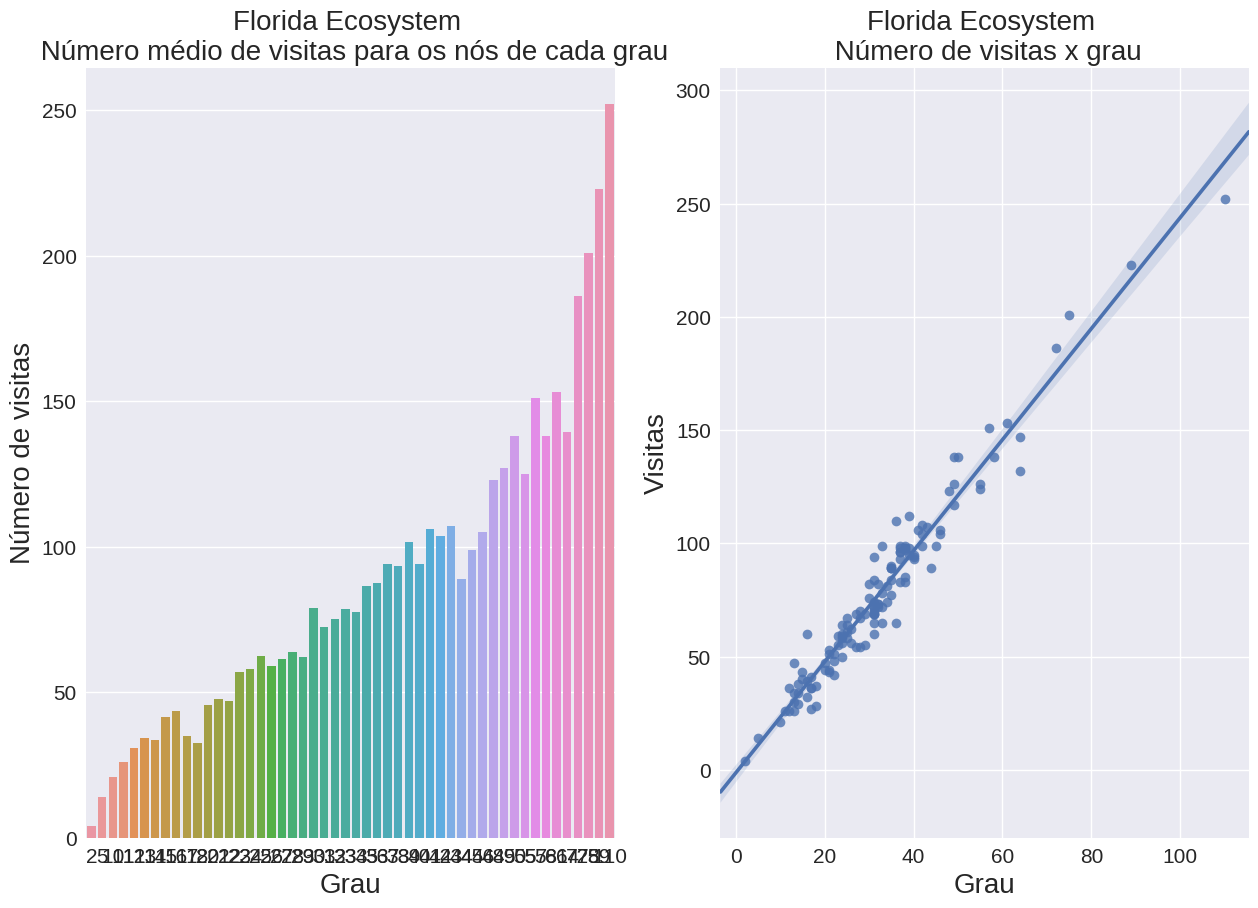

In [22]:
florida_unweighted = threshold_graph(florida_weighted, 0)
path = random_walk(florida_unweighted, 10000)
total, average, visit_degrees = visits_per_degree(florida_unweighted, path)

fig, axis = plt.subplots(1,2, figsize=(15,10))

axis[0].set_xlabel('Grau', fontsize=20)
axis[0].set_ylabel('Número de visitas', fontsize=20)
axis[0].tick_params(labelsize=15)

sns.barplot(x=list(average.keys()), 
            y=list(average.values()),
           ax=axis[0]).set_title('Florida Ecosystem \n Número médio de visitas para os nós de cada grau', 
                                                             fontsize=20)

axis[1].set_xlabel('Grau', fontsize=20)
axis[1].set_ylabel('Visitas', fontsize=20)
axis[1].tick_params(labelsize=15)
sns.regplot(x=visit_degrees[:,0],y=visit_degrees[:,1], 
            ax=axis[1]).set_title('Florida Ecosystem \n Número de visitas x grau', fontsize=20)


Repetimos o teste de hipótese da regressão linear para a rede Florida Ecosystem Wet:

In [23]:
model = stats.linregress(x=visit_degrees[:,0], y=visit_degrees[:,1])
print('Intercepto: ', model.intercept)
print('Inclinação:', model.slope)
print('P-Valor:', model.pvalue)

Intercepto:  -1.388765048996504
Inclinação: 2.4524727533184465
P-Valor: 2.303658899545952e-85


Novamente, nota-se um valor extremamente baixo para o p-valor, resultando na rejeição de $H_0$ e fornecendo nova indicação de que há relação linear entre grau do vértice e número de visitas.

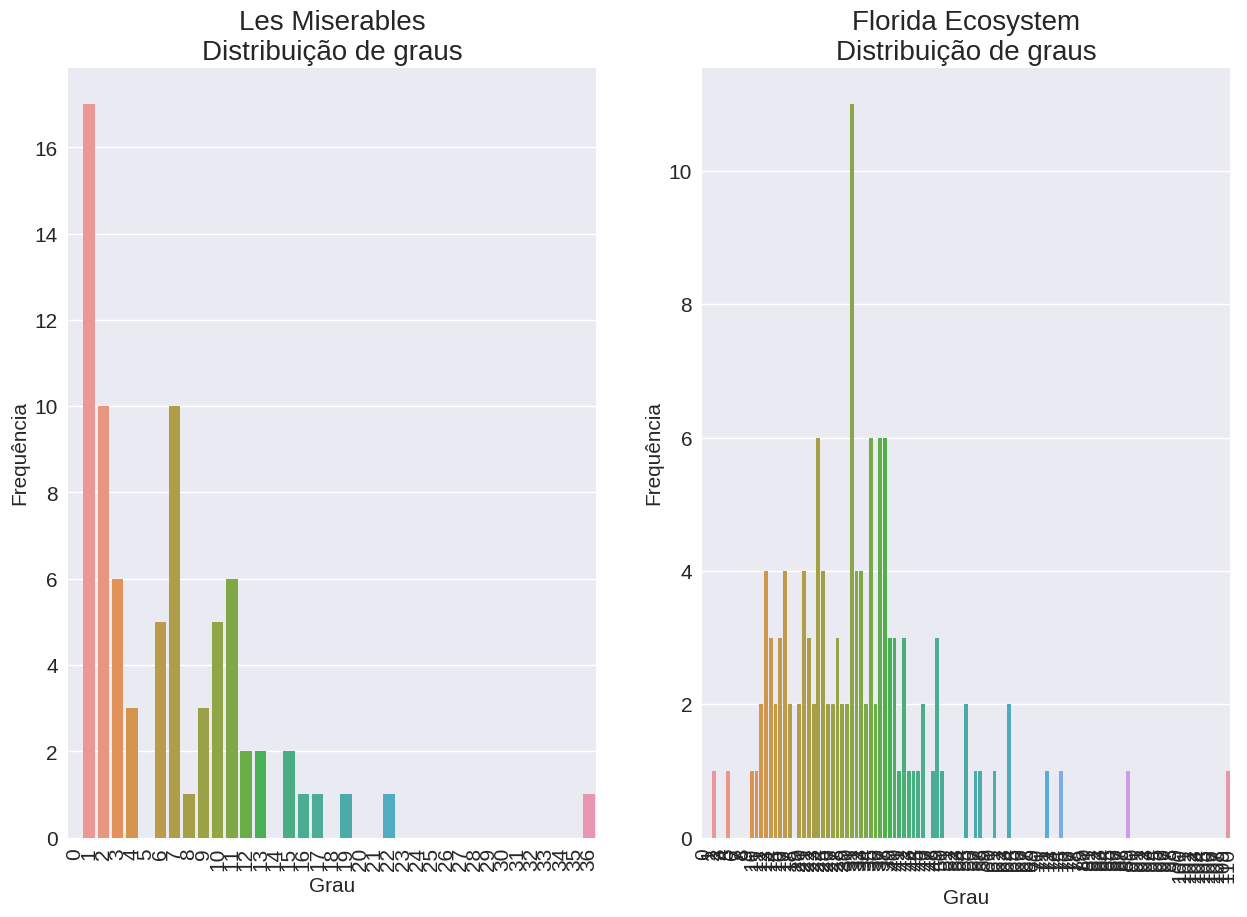

In [24]:
fig, axis = plt.subplots(1, 2, figsize=(15,10))

possib, freq, dist = degree_distribution(lesmis_unweighted)
axis[0].set_xlabel('Grau', fontsize=15)
axis[0].set_ylabel('Frequência', fontsize=15)
axis[0].tick_params(labelsize=15)
g = sns.barplot(x=possib, y=freq, ax=axis[0])
g.set_title('Les Miserables\nDistribuição de graus', fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

possib, freq, dist = degree_distribution(florida_unweighted)
axis[1].set_xlabel('Grau', fontsize=15)
axis[1].set_ylabel('Frequência', fontsize=15)
axis[1].tick_params(labelsize=15)
g2 = sns.barplot(x=possib, y=freq, ax=axis[1])
g2.set_title('Florida Ecosystem\nDistribuição de graus', fontsize=20)
g2.set_xticklabels(g2.get_xticklabels(), rotation=90);

## Questão 4
## Gerando grafo

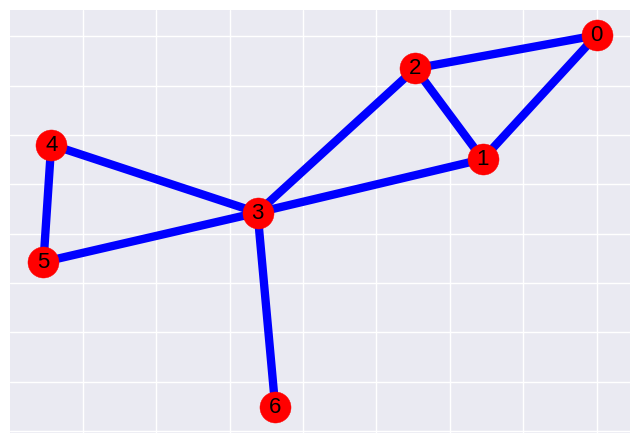

In [25]:
g = nx.Graph()
g.add_edge(0,1)
g.add_edge(0,3)
g.add_edge(1,3)
g.add_edge(1,2)
g.add_edge(3,2)
g.add_edge(2,5)
g.add_edge(2,6)
g.add_edge(5,6)
g.add_edge(2,4)
#g = g.to_undirected()
g = nx.convert_node_labels_to_integers(g, first_label=0)
plot_network(g)
plt.show(True)

A = nx.to_numpy_array(g)
#Calculating ProbMat
edge_probs = (1/np.sum(A, 0))
prob_mat = np.zeros(A.shape)
for i in range(A.shape[0]):
    prob_mat[i,:] = A[i,:]*edge_probs[i]

## Implementação de rotina para potência de matriz

In [26]:
m = []

def matPow(prob_mat,n):
    P_n = prob_mat
    for i in range(1, n):
        P_n = P_n.dot(prob_mat)
    return P_n

for n in [2,5,13,44,70]:
    m.append(matPow(prob_mat,n))
    
#Imprimindo as matrizes
for n in range(0,len(m)):
    print(n)
    print(m[n].round(4))

0
[[0.3333 0.1667 0.1667 0.3333 0.     0.     0.    ]
 [0.1111 0.3444 0.2333 0.1111 0.0667 0.0667 0.0667]
 [0.1111 0.2333 0.3444 0.1111 0.0667 0.0667 0.0667]
 [0.1333 0.0667 0.0667 0.5333 0.1    0.1    0.    ]
 [0.     0.1    0.1    0.25   0.35   0.1    0.1   ]
 [0.     0.1    0.1    0.25   0.1    0.35   0.1   ]
 [0.     0.2    0.2    0.     0.2    0.2    0.2   ]]
1
[[0.116  0.2195 0.2195 0.1938 0.093  0.093  0.0652]
 [0.1463 0.1679 0.172  0.3045 0.0852 0.0852 0.0388]
 [0.1463 0.172  0.1679 0.3045 0.0852 0.0852 0.0388]
 [0.0775 0.1827 0.1827 0.2136 0.1324 0.1324 0.0787]
 [0.093  0.1279 0.1279 0.3309 0.1178 0.149  0.0536]
 [0.093  0.1279 0.1279 0.3309 0.149  0.1178 0.0536]
 [0.1304 0.1163 0.1163 0.3937 0.1072 0.1072 0.0289]]
2
[[0.1111 0.1691 0.1691 0.2734 0.1106 0.1106 0.0563]
 [0.1127 0.1666 0.1666 0.2795 0.11   0.11   0.0547]
 [0.1127 0.1666 0.1666 0.2795 0.11   0.11   0.0547]
 [0.1094 0.1677 0.1677 0.2741 0.1121 0.1121 0.0568]
 [0.1106 0.1649 0.1649 0.2803 0.1119 0.112  0.0554]
 [0.

a) Conforme n aumenta, a matriz de probabilidades, $p_{ij}^n$ tende a ficar com as linhas repetidas, indicando que a probabilidade de atingir um vértice qualquer, independe do vértice inicial.

## 4)B)

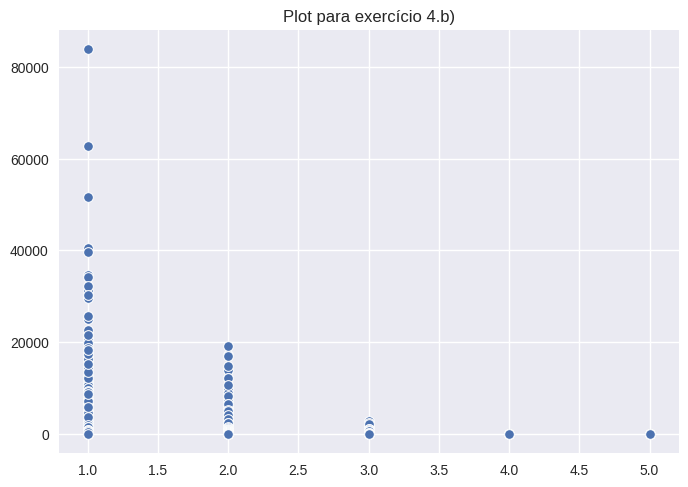

In [27]:
lm = nx.to_undirected(lesmis_weighted)
Gcc=sorted(nx.connected_component_subgraphs(lm), key = len, reverse=True)
lm=Gcc[0]
lm = nx.convert_node_labels_to_integers(lm, first_label=0)
D = dict(nx.all_pairs_shortest_path_length(lm))
A = A = nx.to_numpy_array(lm)
A_3 = matPow(A,3)

distancesX = []
adjacency3Y = []
for u in range(0,A.shape[0]):
    for v in range(u+1, A.shape[1]):
        distancesX.append(D[u][v])
        adjacency3Y.append(A_3[u][v])

sns.scatterplot(x=distancesX,y=adjacency3Y).set_title('Plot para exercício 4.b)');

In [28]:
#returns all matrices powers up to N
def matPowAll(prob_mat,n):
    Pn = []
    P = prob_mat
    for i in range(1, n+1):
        P = P.dot(prob_mat)
        Pn.append(P)
    return Pn

D = dict(nx.all_pairs_shortest_path_length(lm))
A = nx.to_numpy_array(g)
#Calculating ProbMat
edge_probs = (1/np.sum(A, 0))
P = np.zeros(A.shape)
for i in range(A.shape[0]):
    P[i,:] = A[i,:]*edge_probs[i]

nMax=100
Pn = matPowAll(P,nMax)
#flattening matrices
distances = []
for u in range(0,A.shape[0]):
    for v in range(u+1, A.shape[1]):
        distances.append(D[u][v])

## 4)C)

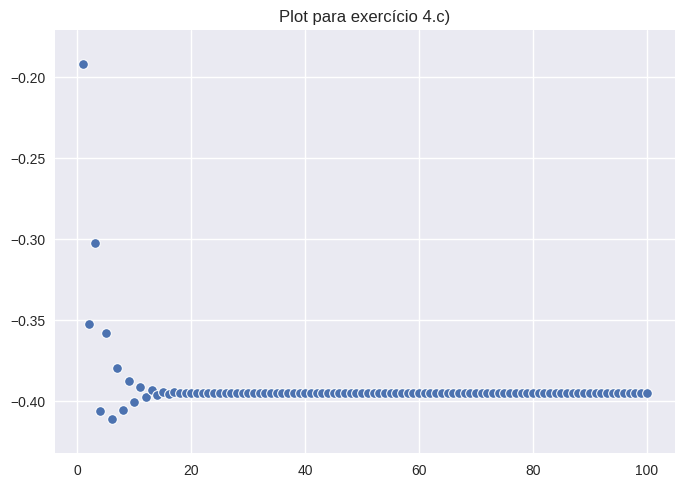

In [29]:
PFlat = []

for n in range(0,len(Pn)): 
    aux = []
    for u in range(0,A.shape[0]):
        for v in range(u+1, A.shape[1]): 
            aux.append(Pn[n][u][v])
    PFlat.append(aux)


#Calculating pearson
import scipy.stats.stats
pearsonY = []
for n in range(0,len(Pn)):
    corr, pvalue = scipy.stats.stats.pearsonr(distances,PFlat[n])
    pearsonY.append(corr)

X = np.arange(1,nMax+1)
sns.scatterplot(x=X,y=pearsonY).set_title('Plot para exercício 4.c)');

## Questão 6

## A)Rede E-road

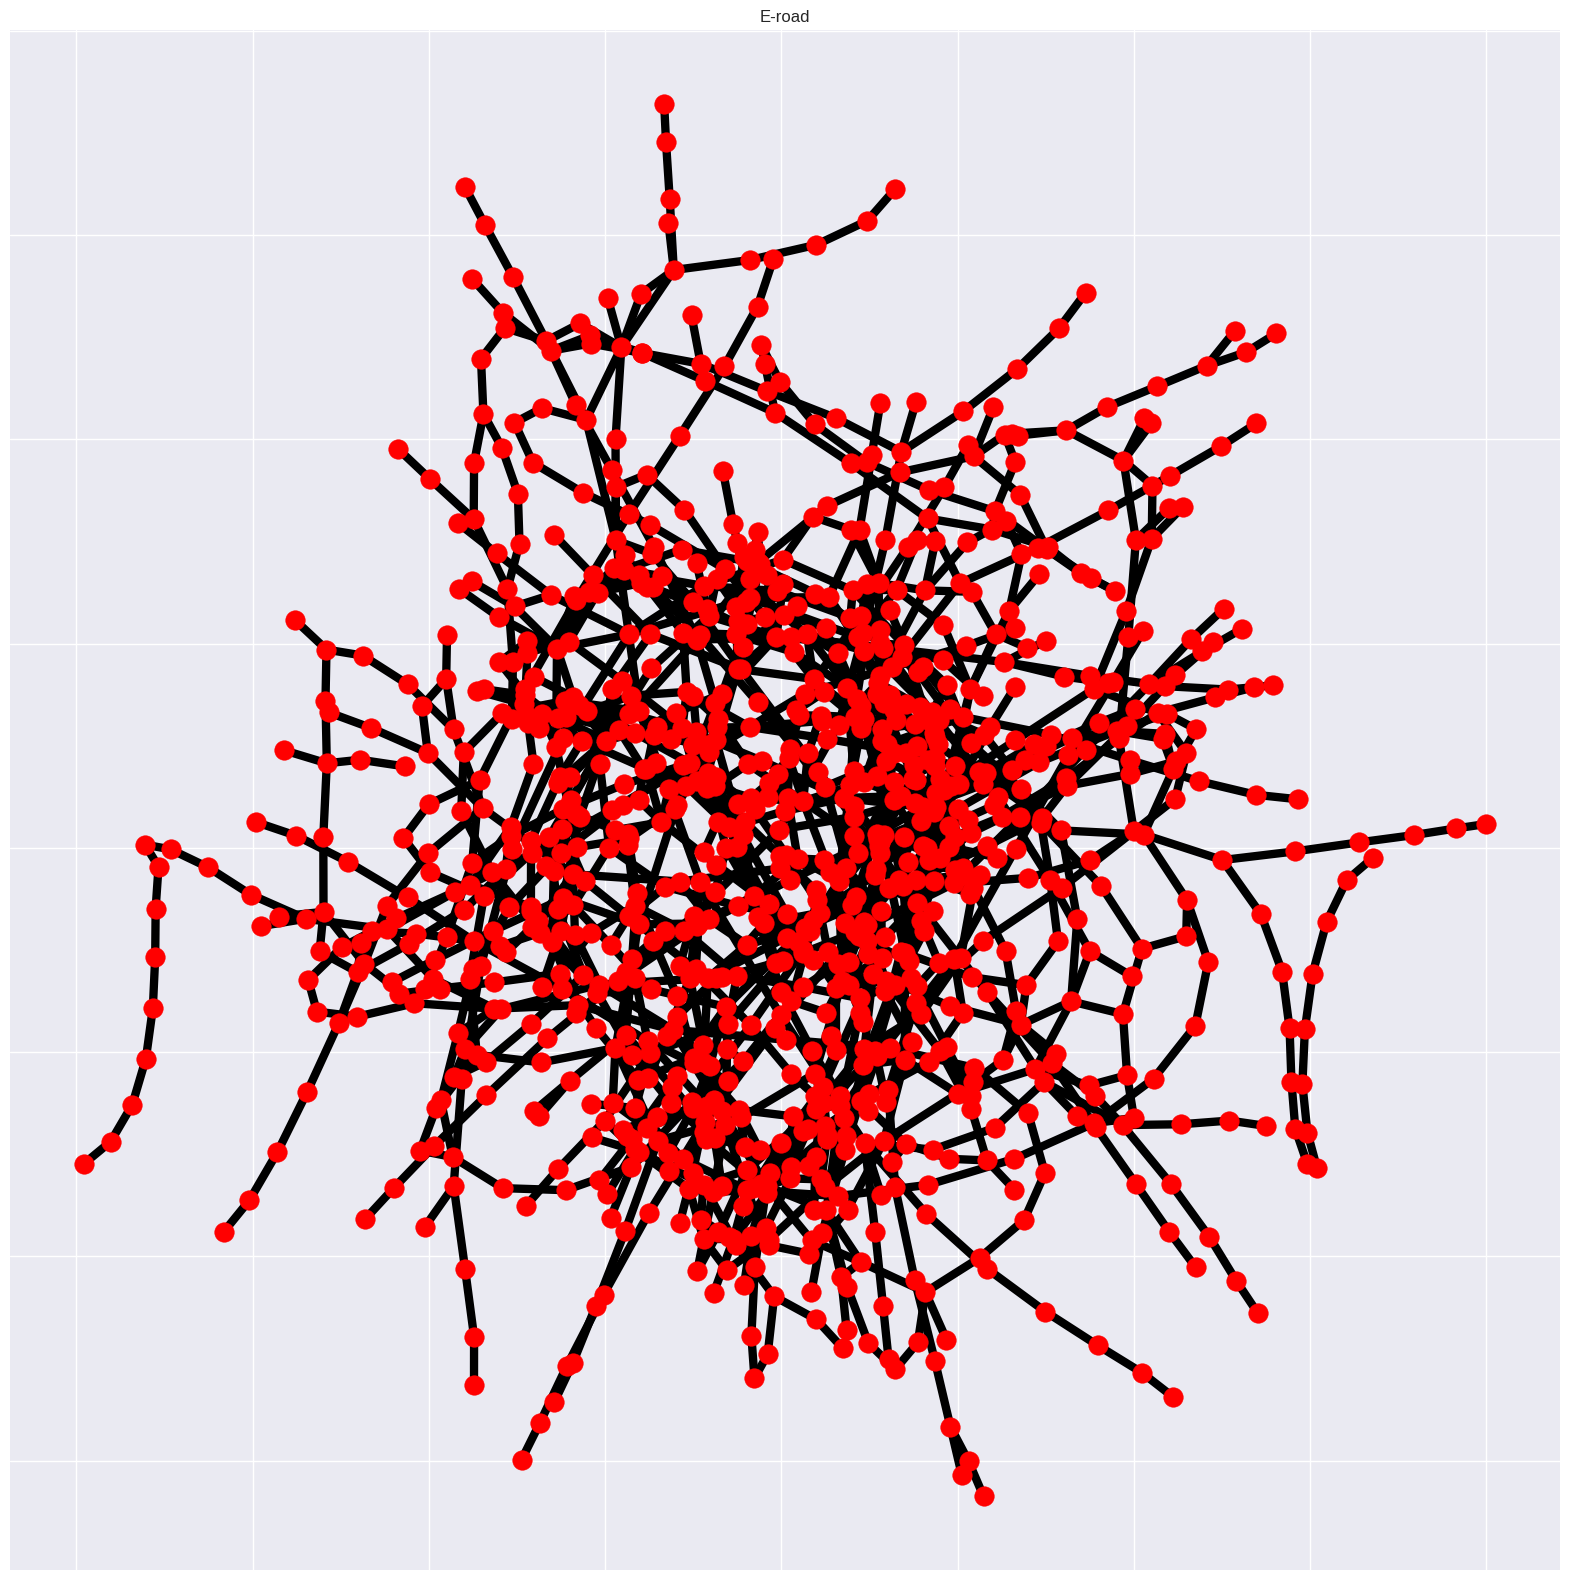

In [30]:
e_road = nx.read_edgelist('datasets/euroroad', comments='%')
e_road = max(nx.connected_component_subgraphs(e_road), key=len)
e_road = e_road.to_undirected()

plt.figure(figsize=(20,20))

pos = nx.spring_layout(e_road)
plt.title('E-road')
nx.draw_networkx(e_road, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)



## 6)B)Rede Dolphins
### A rede Facebook user-user frendships mostrou-se demasiado grande para processar localmente. Portanto, a rede Dolphins será utilizada como substituta na análise.

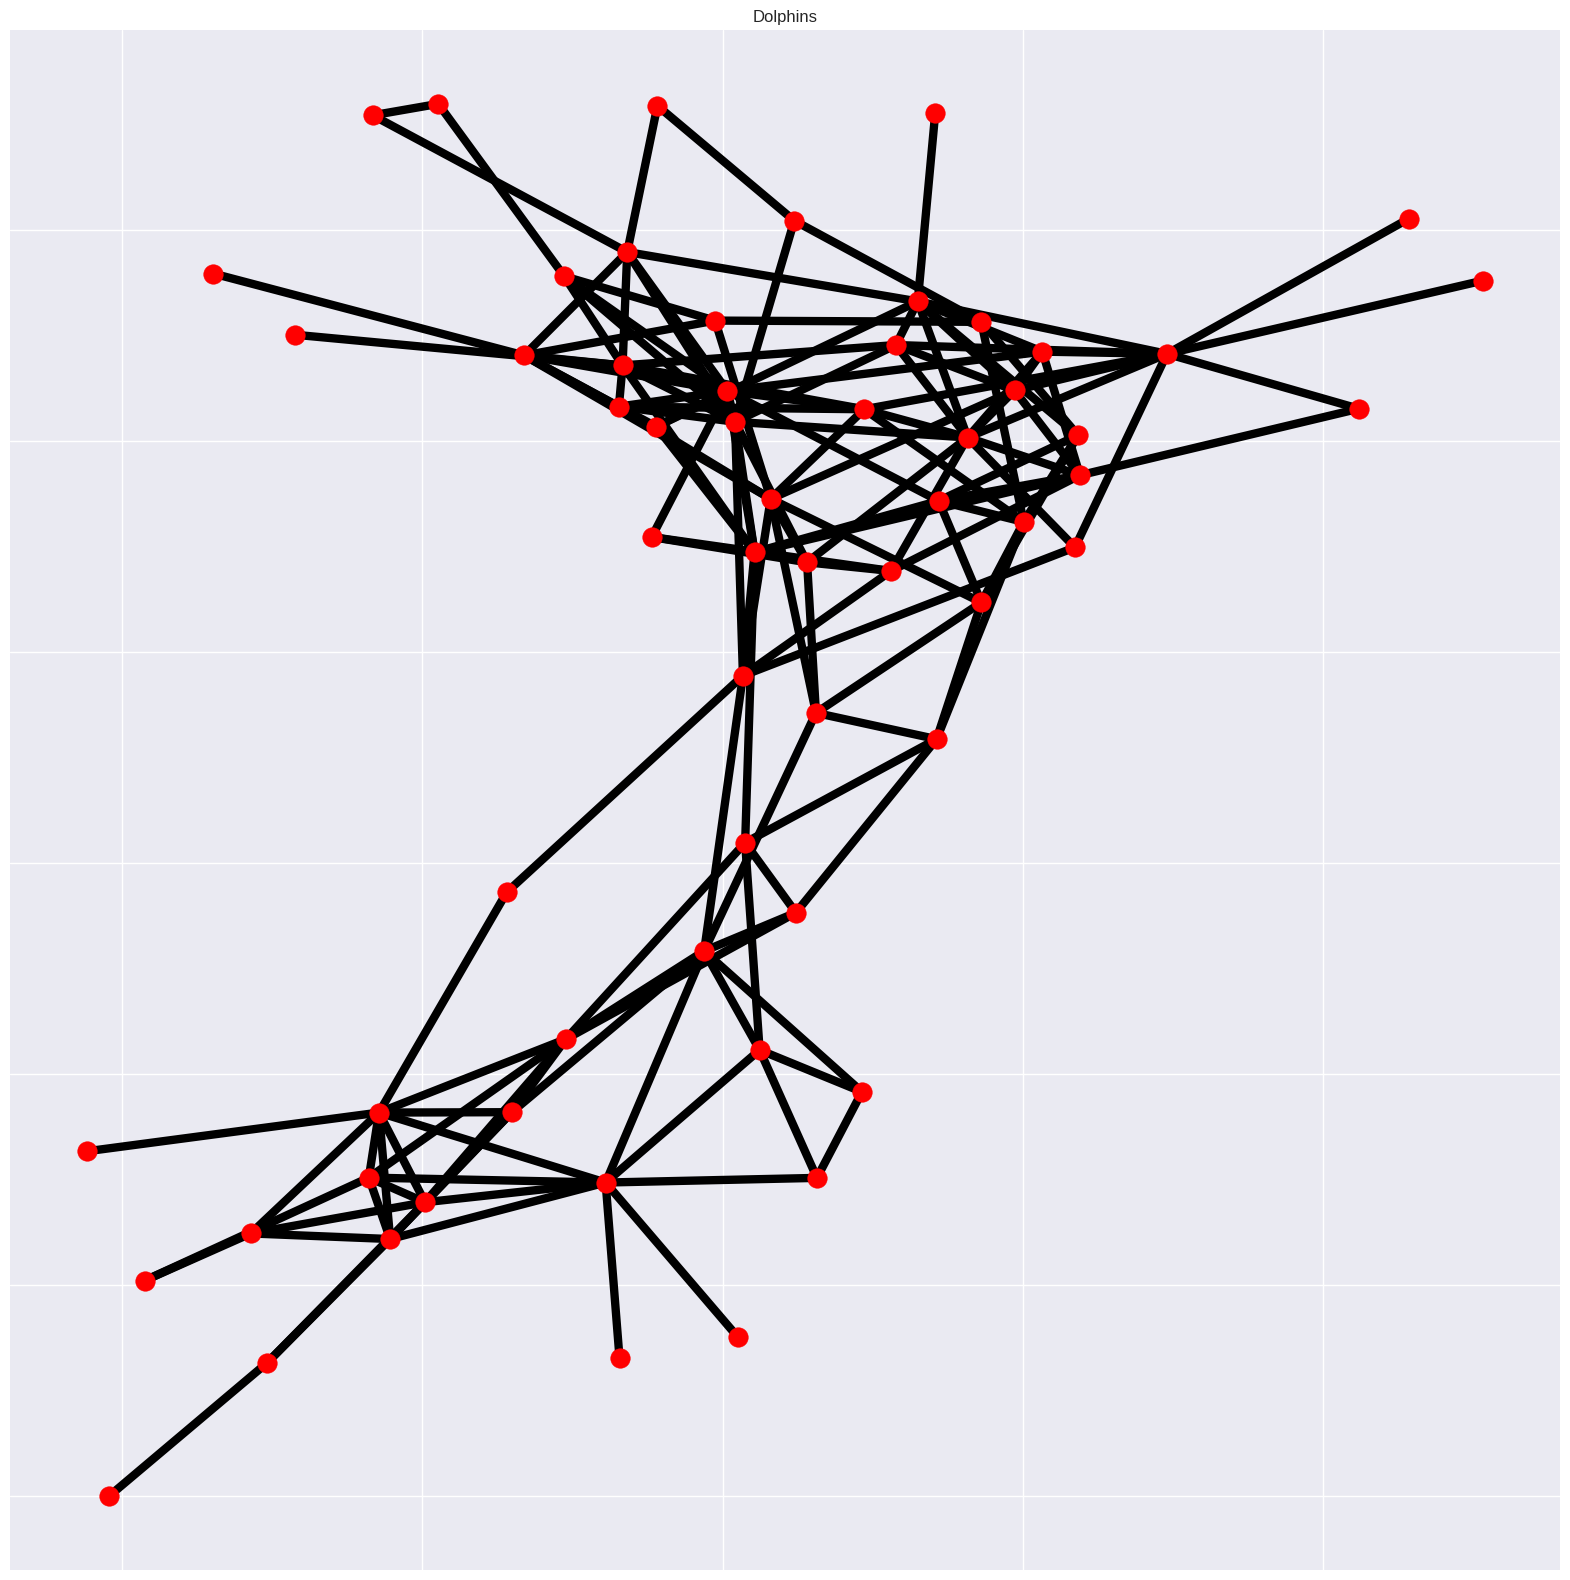

In [31]:
dolphins = nx.read_edgelist('datasets/dolphins', comments='%')
dolphins = max(nx.connected_component_subgraphs(dolphins), key=len)
dolphins = dolphins.to_undirected()

plt.figure(figsize=(20,20))

pos = nx.spring_layout(dolphins)
plt.title('Dolphins')
nx.draw_networkx(dolphins, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)

## 6)C)Rede Netscience

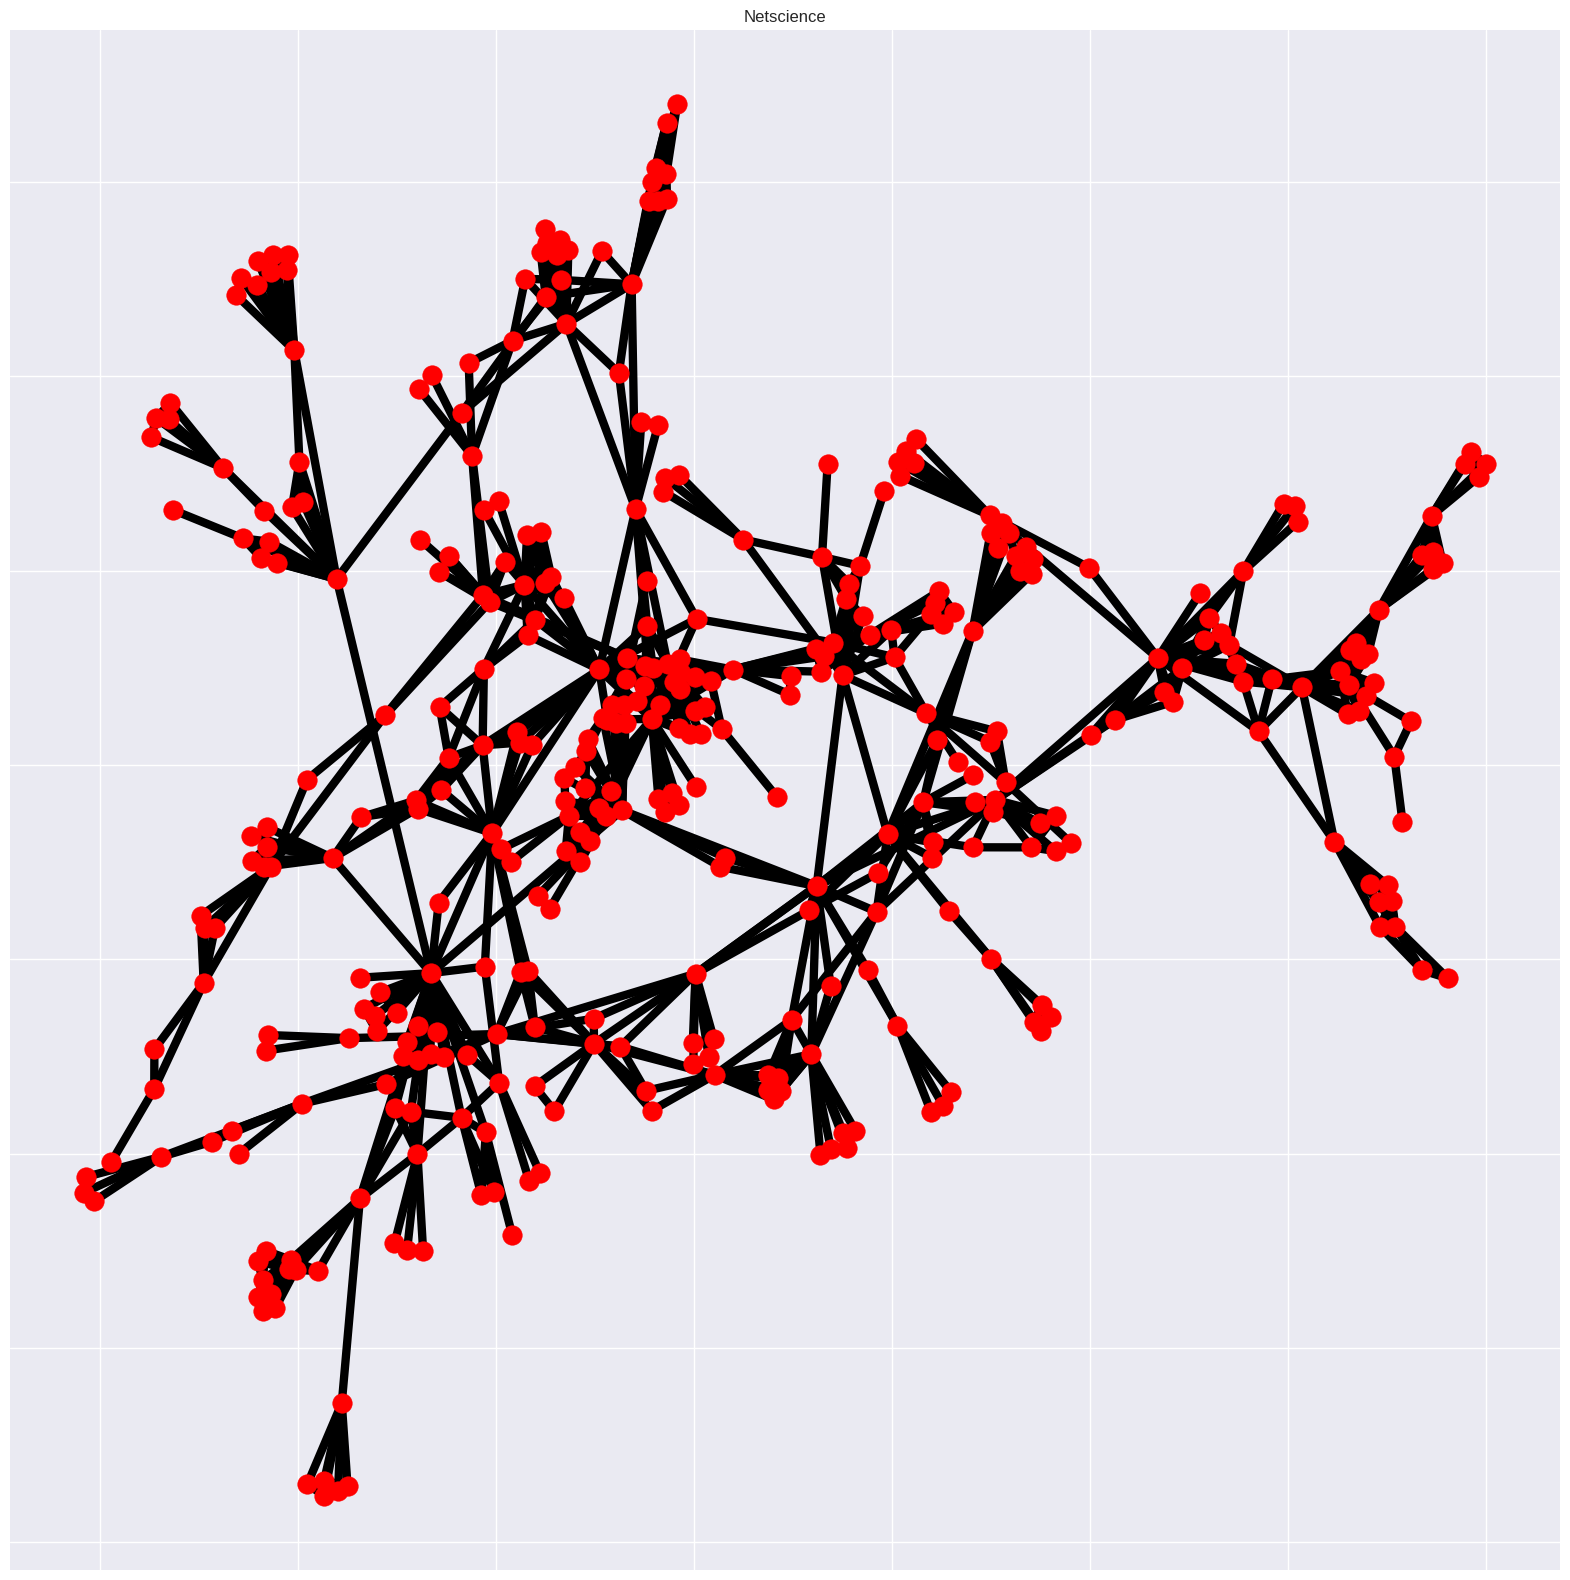

In [32]:
netscience = nx.read_gml('datasets/netscience.gml')
netscience = max(nx.connected_component_subgraphs(netscience), key=len)
netscience = netscience.to_undirected()

plt.figure(figsize=(20,20))

pos = nx.spring_layout(netscience)
plt.title('Netscience')
nx.draw_networkx(netscience, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)


## 6) D) Rede Hamsterster Friendships

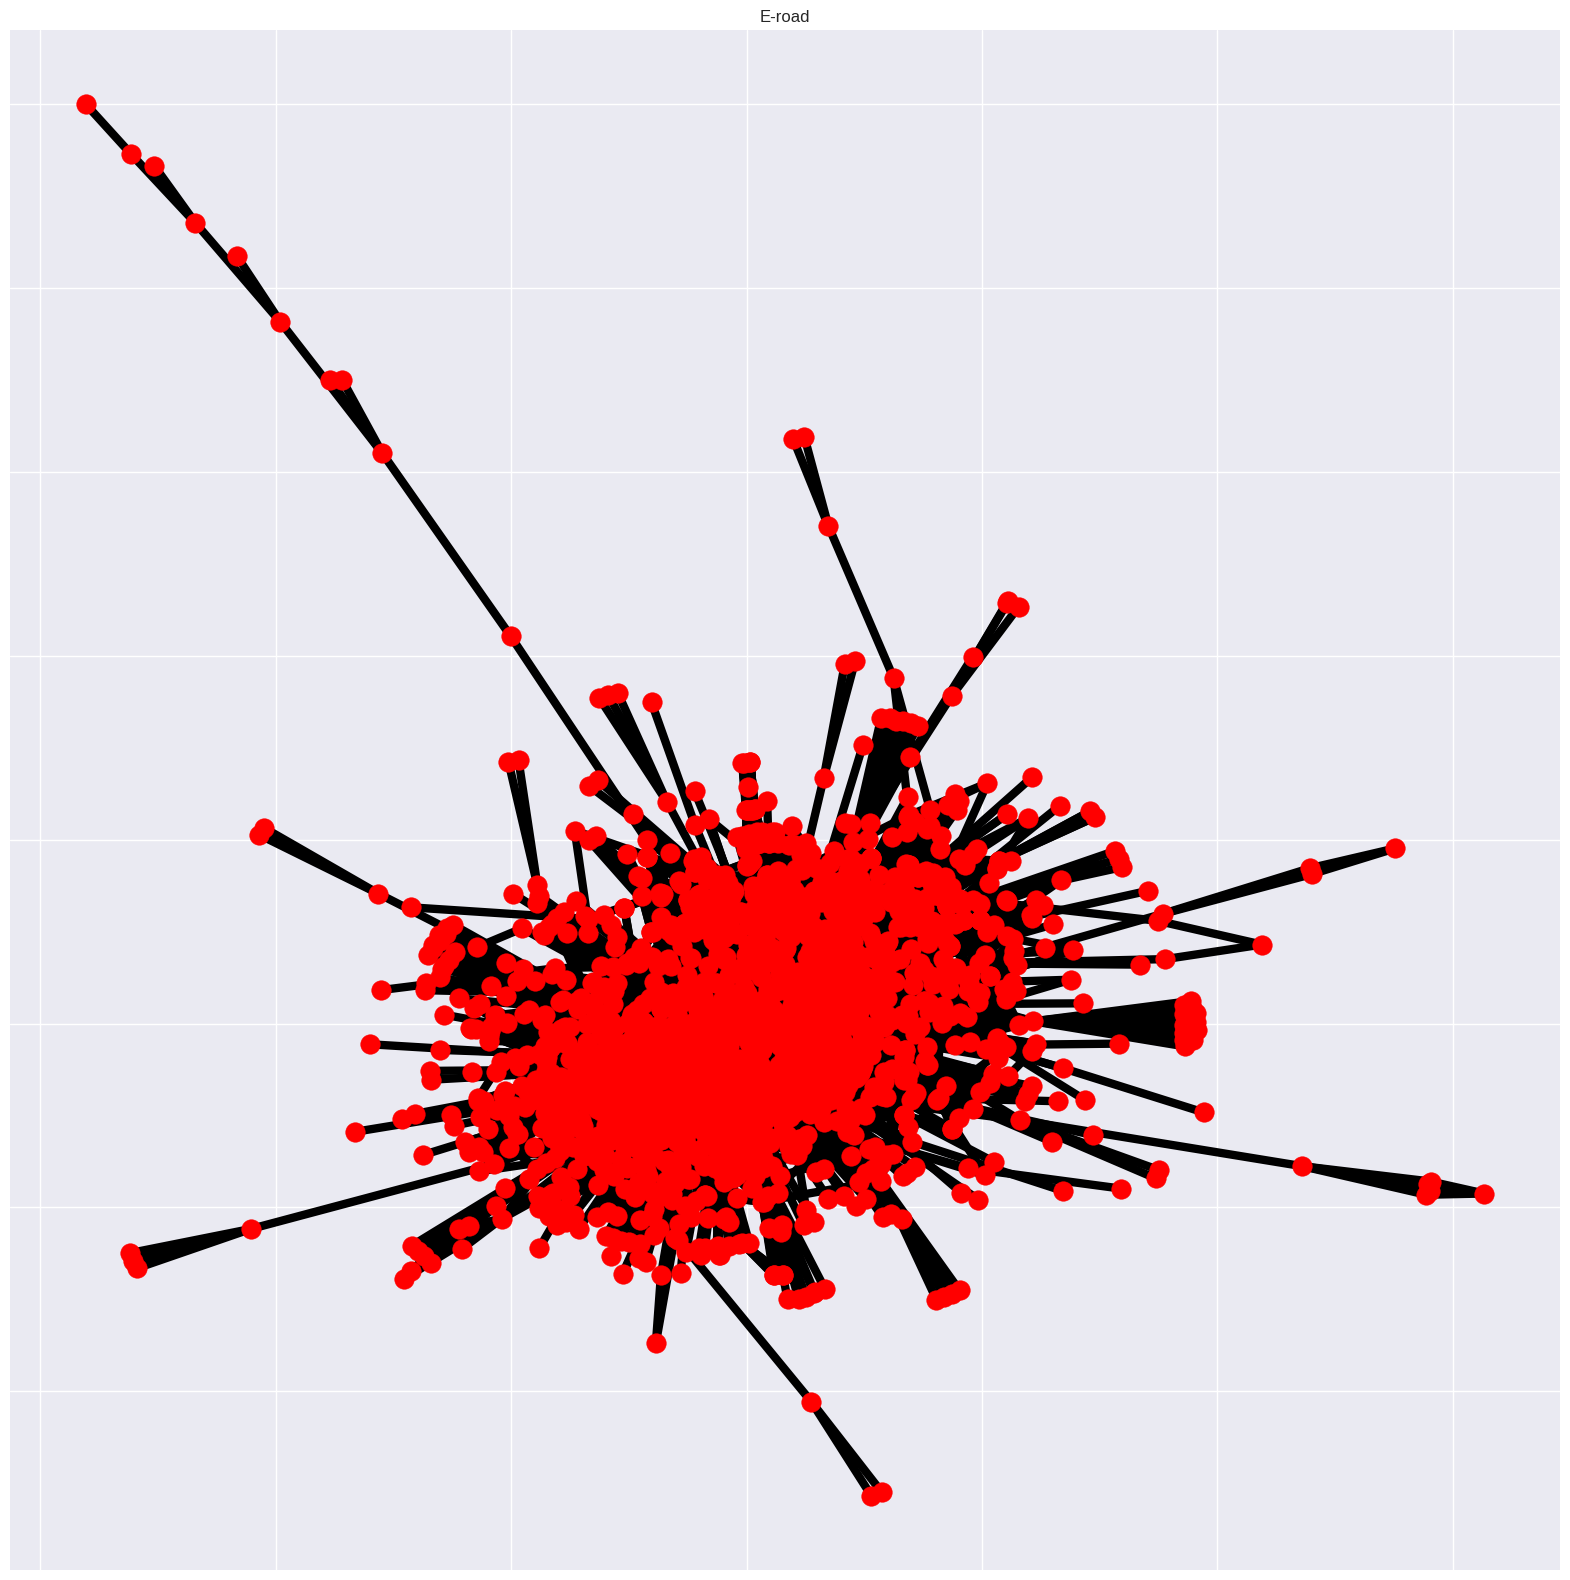

In [33]:
hams = nx.read_edgelist('datasets/hamsterster', comments='%')
hams = max(nx.connected_component_subgraphs(hams), key=len)

plt.figure(figsize=(20,20))

pos = nx.spring_layout(hams)
plt.title('E-road')
nx.draw_networkx(hams, pos=pos, with_labels=False, node_color='red', edge_color= 'Black', 
                 node_size=200, font_size=16, font_color='black', width=6)

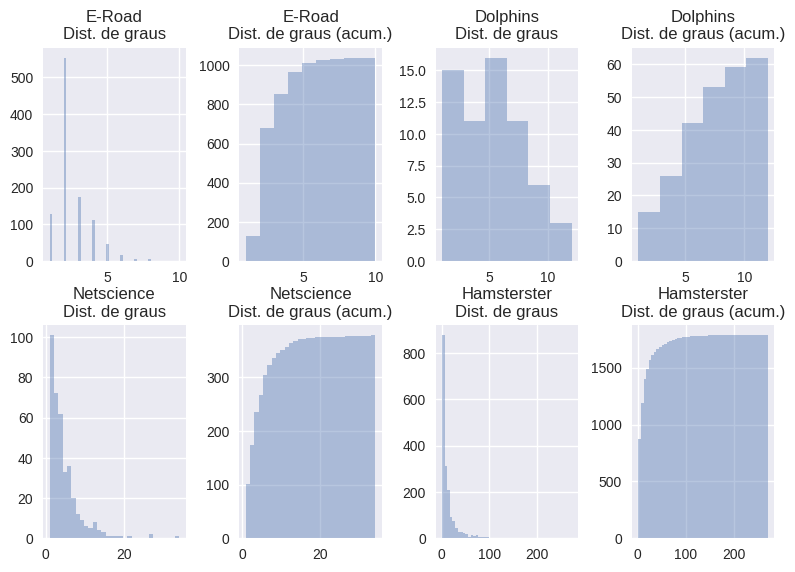

In [34]:
fig, axis = plt.subplots(2,4)
e_road_deg = []
dolphins_deg = []
netscience_deg = []
hams_deg = []

for node, deg in e_road.degree():
    e_road_deg.append(deg)
    
for node, deg in dolphins.degree():
    dolphins_deg.append(deg)
    
for node, deg in netscience.degree():
    netscience_deg.append(deg)
    
for node, deg in hams.degree():
    hams_deg.append(deg)
    
plt.tight_layout(h_pad=2.5)
axis[0,0].set_title('E-Road\nDist. de graus')
sns.distplot(a=e_road_deg, ax=axis[0,0], kde=False)
axis[0,1].set_title('E-Road\nDist. de graus (acum.)')
sns.distplot(a=e_road_deg, hist_kws=dict(cumulative=True), ax=axis[0,1], kde=False)

axis[0,2].set_title('Dolphins\nDist. de graus')
sns.distplot(a=dolphins_deg, ax=axis[0,2], kde=False)
axis[0,3].set_title('Dolphins\nDist. de graus (acum.)')
sns.distplot(a=dolphins_deg, hist_kws=dict(cumulative=True), ax=axis[0,3], kde=False)

axis[1,0].set_title('Netscience\nDist. de graus')
sns.distplot(a=netscience_deg, ax=axis[1,0], kde=False)
axis[1,1].set_title('Netscience\nDist. de graus (acum.)')
sns.distplot(a=netscience_deg, hist_kws=dict(cumulative=True), ax=axis[1,1], kde=False)

axis[1,2].set_title('Hamsterster\nDist. de graus')
sns.distplot(a=hams_deg, ax=axis[1,2], kde=False)
axis[1,3].set_title('Hamsterster\nDist. de graus (acum.)')
sns.distplot(a=hams_deg, hist_kws=dict(cumulative=True), ax=axis[1,3], kde=False)



### Nota-se que as redes Netscience e Hamsterster Friendships são redes sem escala, conforme constata-se pelo fato do grau de seus vértices aderirem à lei de potências.

##  Questão 7

In [35]:
e_road_cl = nx.average_clustering(e_road)
e_road_tr = nx.transitivity(e_road)

dolp_cl = nx.average_clustering(dolphins)
dolp_tr = nx.transitivity(dolphins)

netsci_cl = nx.average_clustering(netscience)
netsci_tr = nx.transitivity(netscience)

hams_cl = nx.average_clustering(hams)
hams_tr = nx.transitivity(hams)

print('E-road')
print('Average clustering', e_road_cl)
print('Transitivity', e_road_tr, '\n')

print('Dolphins')
print('Average clustering', dolp_cl)
print('Transitivity', dolp_tr, '\n')

print('Netscience')
print('Average clustering', netsci_cl)
print('Transitivity', netsci_tr, '\n')

print('Hamsterster friendships')
print('Average clustering', hams_cl)
print('Transitivity', hams_tr, '\n')

E-road
Average clustering 0.018905541042210917
Transitivity 0.03525523319867793 

Dolphins
Average clustering 0.25895824605502027
Transitivity 0.3087757313109426 

Netscience
Average clustering 0.7412306142925665
Transitivity 0.4305750350631136 

Hamsterster friendships
Average clustering 0.14330497043656049
Transitivity 0.09036879493878609 



### Os coeficientes divergem. 

### É possível observar que o coeficiente de clustering médio dá maior impacto aos nós de grau baixo, visto que, da expressão do coeficiente de clustering, $Ci = \frac{2*e_i}{k_i*(k_i-1)}$ decorre que vértices de grau baixo têm menor quantidade de pares possíveis entre vizinhos. Em outras palavras, eles terão um valor menor no denominador, resultando em um coeficiente de clustering mais alto. Isto, então, reflete em um valor mais alto observado no coeficiente de clustering médio. Além disso, o coeficiente de clustering não está definido para vértices de grau 0 ou 1, excluindo-os da análise.

### O coeficiente de transitividade, por sua vez, definido por $T = \frac{3*\#triangulos}{\#triplets}$

### Fernando: As redes sem escala apresentam Clustering Coefficients mais altos que sua Transitividade, enquanto que as outras apresentam comportamento oposto.  As redes cujo Clustering Coefficient foi mais alto que a Transitividade apresentam hubs periféricos muito bem conectados, já as outras duas apresentam uma região central mais interconectada e poucos hubs periféricos.

## Questão 8

In [36]:
e_road_dist = dist_matrix(e_road)
dolphins_dist = dist_matrix(dolphins)
netscience_dist = dist_matrix(netscience)
hams_dist = dist_matrix(hams)

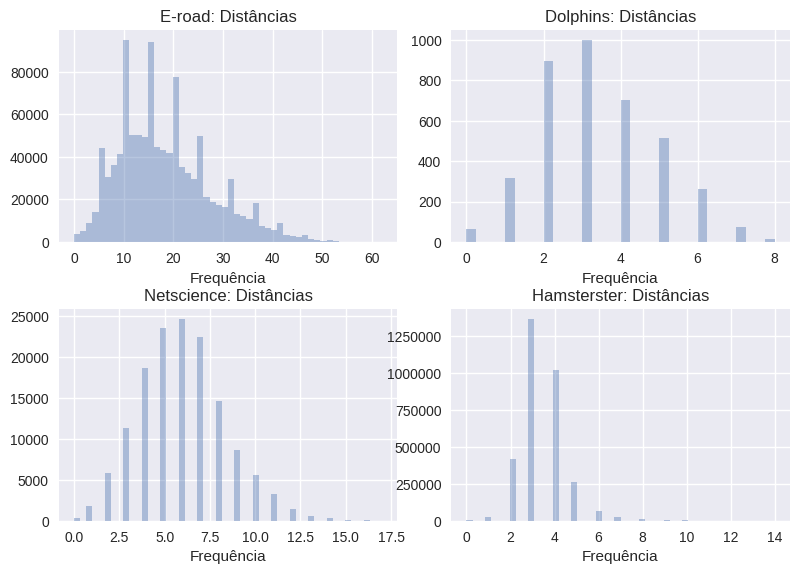

In [37]:
fig, axis = plt.subplots(2,2)

plt.tight_layout(h_pad = 2.7)
axis[0,0].set_title('E-road: Distâncias')
axis[0,0].set_xlabel('Distância')
axis[0,0].set_xlabel('Frequência')
sns.distplot(e_road_dist.astype(np.int32).flatten(), kde=False, ax=axis[0,0]);

axis[0,1].set_title('Dolphins: Distâncias')
axis[0,1].set_xlabel('Distância')
axis[0,1].set_xlabel('Frequência')
sns.distplot(dolphins_dist.astype(np.int32).flatten(), kde=False, ax=axis[0,1]);

axis[1,0].set_title('Netscience: Distâncias')
axis[1,0].set_xlabel('Distância')
axis[1,0].set_xlabel('Frequência')
sns.distplot(netscience_dist.astype(np.int32).flatten(), kde=False, ax=axis[1,0]);

axis[1,1].set_title('Hamsterster: Distâncias')
axis[1,1].set_xlabel('Distância')
axis[1,1].set_xlabel('Frequência')
sns.distplot(hams_dist.astype(np.int32).flatten(), kde=False, ax=axis[1,1]);


# Como explicar?
### Fernando: As redes de livres de escala tendem a ter uma quantidade de passos mais próxima da média (i.e. menor desvio padrão), enquanto que as normais, mesmo tendendo à média, permitem a presença de caminhos mais longos. Isso se dá pela presença comum de hubs em redes livres-de-escala.
### OBS: lembrar que nas redes com distribuição de Poisson, a média é igual a variância, caso precise enriquecer a resposta, mas acho que está OK, como está.

## Questão 9

In [38]:
def avg_deg(g):
    avg = 0
    for node, deg in g.degree():
        avg += deg
    avg = avg/len(list(g.degree()))
    return avg

def avg_cc(g):
    ccs, _, _ = cc_distribution(g)
    return np.sum(ccs)/len(ccs)

def avg_shortest_path_len(g):
    dists = dist_matrix(g).flatten()
    return np.sum(dists)/len(dists)

def compute_metrics(g):
    node_qtt = len(g.nodes())
    avg_degree = avg_deg(g)
    moment = compute_moment(g, 2)
    avg_ccoef = avg_cc(g)
    transitivity = nx.transitivity(g)
    avg_path = avg_shortest_path_len(g)
    diameter = nx.diameter(g)
    return node_qtt, avg_degree, moment, avg_ccoef, transitivity, avg_path, diameter
    
e_road_metrics = compute_metrics(e_road)
dolphins_metrics = compute_metrics(dolphins)
netscience_metrics = compute_metrics(netscience)
hams_metrics = compute_metrics(hams)

df = pd.DataFrame(columns=['network', 'nodes', 'avg_degree', '2nd_m', 'avg_cc', 'transitivity', 'avg_path', 'diameter'])
df.set_index('network', inplace=True)

In [39]:
df.loc['E-road'] = e_road_metrics
df.loc['Dolphins'] = dolphins_metrics
df.loc['Netscience'] = netscience_metrics
df.loc['Hamsterster'] = hams_metrics
print(df)

              nodes  avg_degree       2nd_m    avg_cc  transitivity  \
network                                                               
E-road       1039.0    2.512031    7.753609  0.018906      0.035255   
Dolphins       62.0    5.129032   34.903226  0.258958      0.308776   
Netscience    379.0    4.823219   38.686016  0.741231      0.430575   
Hamsterster  1788.0   13.955257  635.606264  0.143305      0.090369   

              avg_path  diameter  
network                           
E-road       18.377441      62.0  
Dolphins      3.302810       8.0  
Netscience    6.025926      17.0  
Hamsterster   3.450709      14.0  


### Fernando:
### E-Road, possui muitos nós de grau baixo, mas não apresenta um comportamento de lei de potência, os caminhos longos e alto diâmetro indicam a presença de várias cadeias de nós com grau baixo conectados; 
### Dolphins: já a rede Dolphins, apesar do número relativamente baixo de nós, possui um grau médio alto, a presença de caminhos curtos e diâmetro baixo indicam que a rede deve ser bem conectada, com vários clicks, como foi visto na comparação avg_cc e transitivity da questão 7;
### Netscience: apresenta um alto avg_cc comparado a sua transitividade, além de um caminho médio relativamente alto, indicando uma rede com várias camadas de hubs, forçando um caminhante a sempre passar por esses hubs para atingir outros vértices;
### Hamsterster: Apesar da grande quantidade de nós, o caminho médio é curto devido ao altyo grau médio dos nós, consequentemente o diâmetro da rede é baixo.

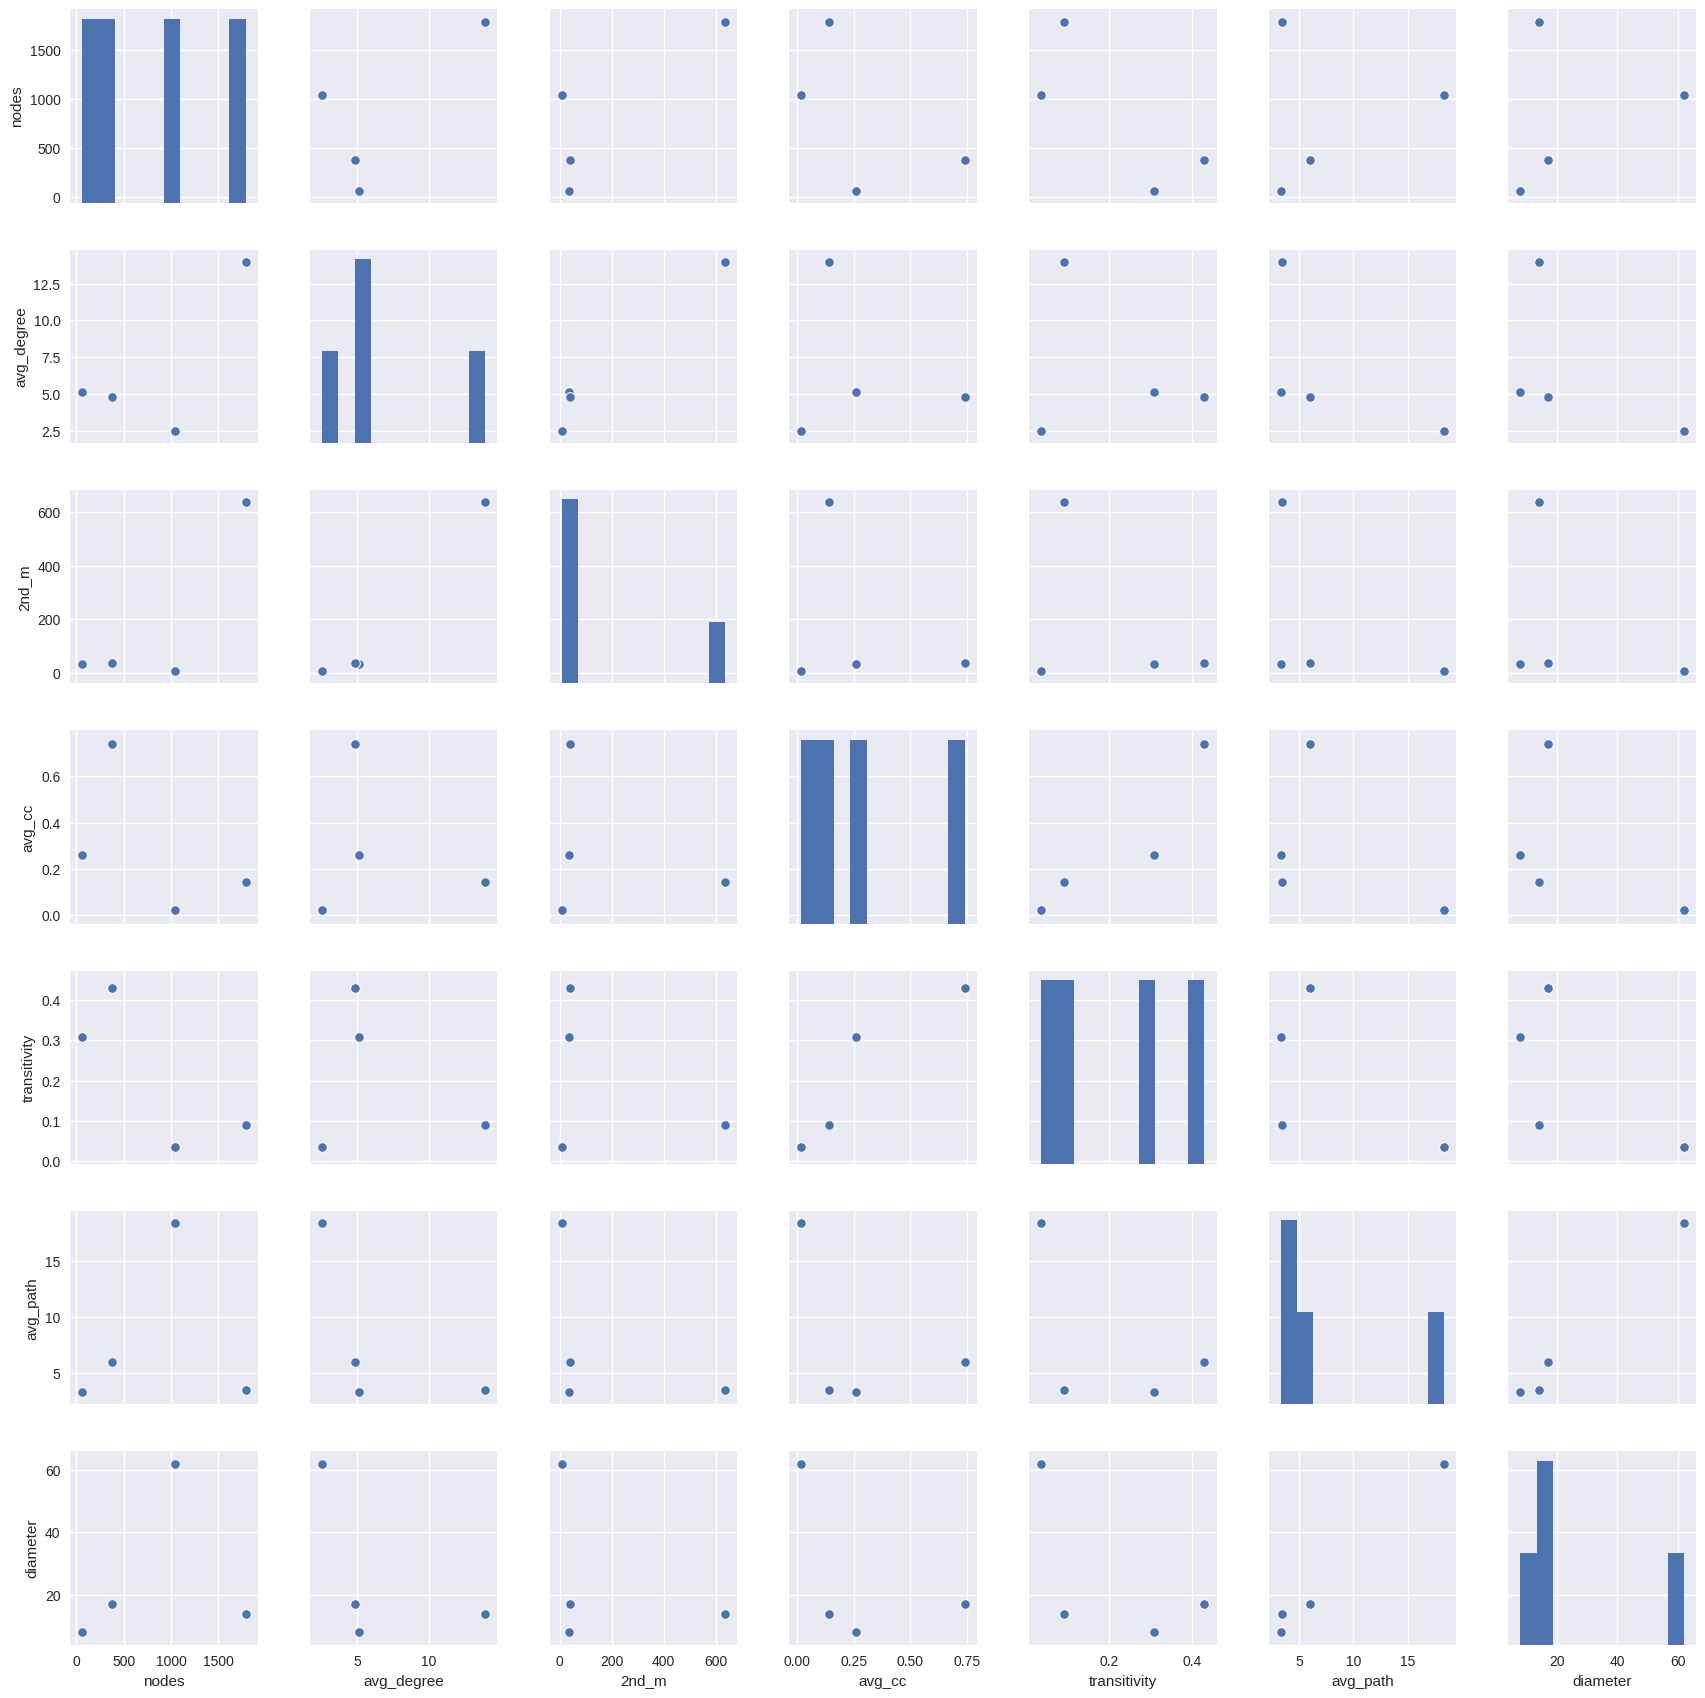

In [40]:
#plt.rcParams.update({'font.size': 22})
#sns.pairplot(df);

## Questão 10
### Em função do longo tempo de processamento, as cidades foram trocadas por vilas de menor dimensão. Londres foi substituída por Clovelly, Berlim por Lübeck e Paris por Saint-Emilion.

In [116]:
clovelly = ox.graph_from_place('Clovelly, Devon, South West England, England, EX39 5TQ, United Kingdom', which_result=2)
walsdorf = ox.graph_from_place('Walsdorf, Landkreis Bamberg, Upper Franconia, Bavaria, 96194, Germany', which_result=1)
emilion = ox.graph_from_place('Saint-Émilion, Libourne, Gironde, New Aquitaine, Metropolitan France, 33330, France', which_result=1)

### Cloverly

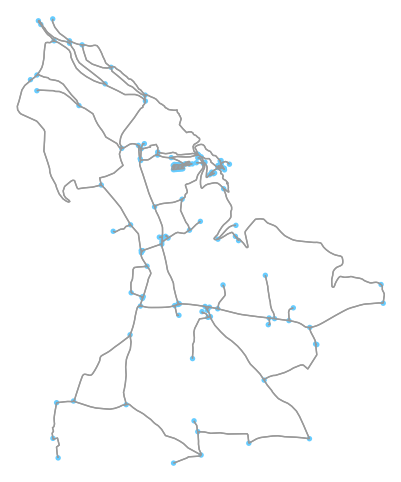

In [117]:
ox.plot_graph(clovelly);

### Fernando: rede simples, poucas bifurcações, seria fácil encontrar um endereço desejado.

### Walsdorf

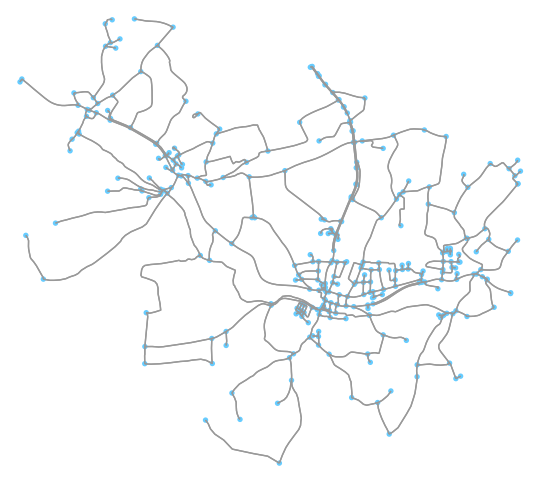

In [118]:
ox.plot_graph(walsdorf);

### Fernando: Possui áreas bem definidas, mas mais complicada de navegar que Cloverly

### Emilion

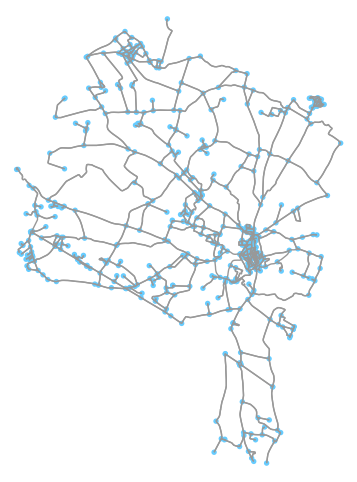

In [119]:
ox.plot_graph(emilion);

### Fernando: Parece a mais complicada de navegar, não só possui mais nós, como também mais bifurcações.

In [121]:
clovelly = clovelly.to_undirected()
clovelly = max(nx.connected_component_subgraphs(clovelly), key=len)
clovelly = nx.Graph(clovelly)

walsdorf = walsdorf.to_undirected()
walsdorf = max(nx.connected_component_subgraphs(walsdorf), key=len)
walsdorf = nx.Graph(walsdorf)

emilion = emilion.to_undirected()
emilion = max(nx.connected_component_subgraphs(emilion), key=len)
emilion = nx.Graph(emilion)

def complexity(g):
    degrees, freq, dist = degree_distribution(g)
    k_2 = 0
    k = 0
    for degree, frac in zip(degrees, dist):
        k_2 += (degree**2)*frac
        k += degree*frac
    return k_2/k

cities_df = pd.DataFrame(columns=['city','complexity','shortest_path', 'clustering'])
cities_df.set_index('city', inplace=True)

cities_df.loc['clovelly'] = [complexity(clovelly),avg_shortest_path_len(clovelly), avg_cc(clovelly)]

cities_df.loc['cochem'] = [complexity(cochem), avg_shortest_path_len(cochem), avg_cc(cochem)]

cities_df.loc['emilion'] = [complexity(emilion), avg_shortest_path_len(emilion), avg_cc(emilion)]

print(cities_df)

          complexity  shortest_path  clustering
city                                           
clovelly    2.852071       9.166420    0.063704
cochem      2.827830      12.721266    0.032738
emilion     2.828854      15.996732    0.023938


### Fernando: As redes das cidades são similares em termos de complexity ($\alpha$), contudo variam em termos de average clustering complexity (clustering), as redes com maior clustering parecem mais simples de navegar. Quanto ao caminho mínimo, também está relacionado à facilidade de se deslocar de um ponto a outro da cidade e é indício direto da eficiência de transito da cidade (as pessoas rapidamente atingem o destino desejado), mas pode exigir um maior conhecimento da cidade para evitar se perder.